# Investigating Movies Dataset

<a id='intro'></a>
## Introduction

> We are going to investigate and analyze movies dataset. This data set containes a set of movies and some information about them like popularity of movie, the budget this movie took in its production, the revenue this movie made, the cast, and genres of these movies, and the rating this movie had with the count of voters.

We will clean the dataset and prepare it for analysis first then we will try to apply Exploratory Data Analysis to it and answer some questions about the data so we can get some useful information from it.

Finally we will try to identify coorelation between features and identify the independent variables and what variables are dependent on them so we can prepare a case for prediction and building ML model.

## Research Questions

> in this report we will investigate the data and try to find answers to these questions:

1. What are the empact of each factor in revenue from year 2006 to 2015?

2. What are the Top 10 Movies in terms of Movies count, Revenue, Budget, and Popularity and What are the empact on these movies regarding Revenue?

3. What are the top 10 Actors in terms of highest revenue, budget, and popularity? and what are the empact of these factors on revenue ?

4. What are the empact of genres in revenue and budget?

5. What are the empact of production companies in revenue and budget?

In [ ]:
# Loading Necessary Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

<a id='wrangling'></a>
# Data Wrangling

> In this part we will load the data, show it to identify the kind of cleansing it need and apply data wrangling to it.

### General Properties

In [2]:
# Loading Data
df = pd.read_csv('drive/My Drive/tmdb-movies.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

> From the previous output we can notice that there are missing data like in cast, homepage, director, tagline, keywords, overview, genres,and production companies. We can say that some of these columns are not important to our analysis like homepage column which is the most column with missing data so we will drop it beside overview, keywords, tagline, imdp id which they will not be useful on our analysis.




### Data Cleaning: Dropping Un-necessary columns

In [3]:
# drop ['imdb_id','homepage','tagline','keywords', 'overview'] columns from the dataframe
df.drop(['imdb_id','homepage','tagline','keywords', 'overview'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  int64  
 3   revenue               10866 non-null  int64  
 4   original_title        10866 non-null  object 
 5   cast                  10790 non-null  object 
 6   director              10822 non-null  object 
 7   runtime               10866 non-null  int64  
 8   genres                10843 non-null  object 
 9   production_companies  9836 non-null   object 
 10  release_date          10866 non-null  object 
 11  vote_count            10866 non-null  int64  
 12  vote_average          10866 non-null  float64
 13  release_year          10866 non-null  int64  
 14  budget_adj            10866 non-null  float64
 15  revenue_adj        


> We can see now that there's missing data in multiple columns that we can use in our analysis but these columns are text columns like cast, genres and production companies that absloutely can't be replaced with any other data because that would cause false data. so we should drop the missing rows and work with the movies that there data is complete which are in total 9773 movie.



### Data Cleaning: Dropping Missing Values

In [4]:
# dropping rows with null values
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9773 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9773 non-null   int64  
 1   popularity            9773 non-null   float64
 2   budget                9773 non-null   int64  
 3   revenue               9773 non-null   int64  
 4   original_title        9773 non-null   object 
 5   cast                  9773 non-null   object 
 6   director              9773 non-null   object 
 7   runtime               9773 non-null   int64  
 8   genres                9773 non-null   object 
 9   production_companies  9773 non-null   object 
 10  release_date          9773 non-null   object 
 11  vote_count            9773 non-null   int64  
 12  vote_average          9773 non-null   float64
 13  release_year          9773 non-null   int64  
 14  budget_adj            9773 non-null   float64
 15  revenue_adj         

> Now after we cleaned the missing data we should take care of the data types. We need to identify each correct data type for each column and assign it to that data type.
> We can see here that id and relase year are integers which are not true these data should be strings because making calculations on them won't make any sense. So we will convert both columns to strings. Also the release date is shown as object data type while it should be datetime data type so we will also convert the release date to date data type.



### Data Cleaning: Assigning Correct Data Types

In [5]:
# convert id column from int to string
df['id'] = df['id'].astype(str)
# convert release year from int to string
df['release_year'] = df['release_year'].astype(str)
# convert release date from string to datetime data type
df['release_date'] = pd.to_datetime(df['release_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9773 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9773 non-null   object        
 1   popularity            9773 non-null   float64       
 2   budget                9773 non-null   int64         
 3   revenue               9773 non-null   int64         
 4   original_title        9773 non-null   object        
 5   cast                  9773 non-null   object        
 6   director              9773 non-null   object        
 7   runtime               9773 non-null   int64         
 8   genres                9773 non-null   object        
 9   production_companies  9773 non-null   object        
 10  release_date          9773 non-null   datetime64[ns]
 11  vote_count            9773 non-null   int64         
 12  vote_average          9773 non-null   float64       
 13  release_year     

> We Also here have 3 columns that contains lists of names or genres separated with '|' so we will convert them to lists.

In [6]:
# split each value in cast, genres, and production companies with using '|' delimeter 
# and conver the columns to lists datatype
df['cast'] = df['cast'].str.split('|')
df['genres'] = df['genres'].str.split('|')
df['production_companies'] = df['production_companies'].str.split('|')



### Data Cleaning:Removing Outliers

> Now Lets take a look about the data itself so we can ecognize outliers and data that doesn't make any sense.

In [7]:
# show summary statistics for the numeric values in the dataset
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
count,9773.000000,9.773000e+03,9.773000e+03,9773.000000,9773.000000,9773.000000,9.773000e+03,9.773000e+03
mean,0.694711,1.618108e+07,4.422678e+07,102.925509,239.298782,5.963430,1.941707e+07,5.704735e+07
std,1.036879,3.220939e+07,1.225834e+08,27.876224,602.982068,0.913179,3.566467e+07,1.514432e+08
min,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,0.000000e+00,0.000000e+00
25%,0.232756,0.000000e+00,0.000000e+00,90.000000,18.000000,5.400000,0.000000e+00,0.000000e+00
50%,0.419765,2.000000e+05,0.000000e+00,100.000000,46.000000,6.000000,3.114254e+05,0.000000e+00
75%,0.776380,1.940000e+07,3.104204e+07,112.000000,173.000000,6.600000,2.469335e+07,4.311344e+07
max,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,4.250000e+08,2.827124e+09


> We can notice from the previous output some points that need to be took care of.

- The range of the popularity doesn't make any sense we can see that 75% of the data between 0.000188 and 0.776380 which mean that its in the range of 0 to 1 but we can see that the maximum value is more than 32 which doesn't make any sense in terms of the data given.

- The runtime column have minimum of 0 which of course doesn't make any sense because absloutly it's not convenient to have a movie that has 0 runtime also we can see that the maximum value is 877 minutes which is more than 14 hours and also it doesn't make any sense to have a movie that is last for that long time.

> We can say now from the previous two observations that there's outliers in this dataset that need to be moved.

In [8]:
# removing rows with outliers from the dataset
df = df[(np.abs(stats.zscore(df[['popularity','runtime']])) < 3).all(axis=1)].reset_index(drop=True)
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
count,9435.000000,9.435000e+03,9.435000e+03,9435.000000,9435.000000,9435.000000,9.435000e+03,9.435000e+03
mean,0.607674,1.487209e+07,3.673472e+07,102.349974,190.021410,5.928988,1.809623e+07,4.886587e+07
std,0.595210,2.876819e+07,9.123045e+07,18.560144,404.062247,0.897569,3.275766e+07,1.215011e+08
min,0.000188,0.000000e+00,0.000000e+00,21.000000,10.000000,1.500000,0.000000e+00,0.000000e+00
25%,0.231405,0.000000e+00,0.000000e+00,91.000000,18.000000,5.400000,0.000000e+00,0.000000e+00
50%,0.413991,1.140000e+05,0.000000e+00,99.000000,45.000000,6.000000,2.025573e+05,0.000000e+00
75%,0.753847,1.800000e+07,2.900911e+07,111.000000,163.000000,6.600000,2.340083e+07,4.018421e+07
max,3.791881,4.250000e+08,1.123747e+09,186.000000,7080.000000,8.700000,4.250000e+08,2.167325e+09


> We can see also that there are some rows with 0 revenue and 0 budget which of course can be considered as missing data so we will drop rows with this values so the data can be clean and effictive in our hypothesis.

In [9]:
df = df[df['revenue'] != 0]
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
count,4569.000000,4.569000e+03,4.569000e+03,4569.000000,4569.000000,4569.000000,4.569000e+03,4.569000e+03
mean,0.885166,2.749910e+07,7.585733e+07,106.857956,345.071788,6.114029,3.317203e+07,1.009082e+08
std,0.705516,3.612246e+07,1.192500e+08,17.107653,533.920007,0.778185,4.017637e+07,1.588566e+08
min,0.001783,0.000000e+00,2.000000e+00,26.000000,10.000000,2.100000,0.000000e+00,2.370705e+00
25%,0.390240,1.700000e+06,7.985929e+06,95.000000,48.000000,5.600000,2.370705e+06,1.088074e+07
50%,0.669161,1.500000e+07,3.085781e+07,104.000000,144.000000,6.200000,2.025573e+07,4.294259e+07
75%,1.146492,3.800000e+07,9.292120e+07,116.000000,395.000000,6.700000,4.754611e+07,1.213115e+08
max,3.791881,4.250000e+08,1.123747e+09,186.000000,7080.000000,8.400000,4.250000e+08,2.167325e+09


> Now to make the dataset more clean and prepared for analysis we need to expand the dataframe to have a separate row to each value in the lists in cast, genres, and production companies.



### Data Cleaning: Expanding each column of list in separate dataframe

In [10]:
# Expanding each column from the columns of type lists so we can analyze data regarding each value in the lists
# we saved the expanded dataframe in a new datafrmae for each column
df_cast_expanded = df.explode('cast')
df_genres_expanded = df.explode('genres')
df_production_companies_expanded = df.explode('production_companies')

<a id='eda'></a>
# Exploratory Data Analysis

> **Tip**: Now that we've trimmed and cleaned our data, we're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions.



In [11]:
# Showing the size of the dataset and the range of years this dataset fall in.
print("Dataset Size: {}, From year {}, to year {}".format(len(df),df['release_year'].min(),df['release_year'].max()))

Dataset Size: 4569, From year 1960, to year 2015


## Research Question (1) : What are the empact of each factor in revenue from year 2006 to 2015?

> Number of Movies, Revenue, and Budget for Latest 10 years in the dataset from 2006 to 2015

In [12]:
# calculating the count of movies in each year in the last 10 years of the dataset
top_10_year_count = df[['release_year','id']].groupby('release_year').count().sort_values('release_year',ascending=False).head(10)
# calculating the mean of revenue in each year in the last 10 years of the dataset
top_10_year_revenue = df[['release_year','revenue']].groupby('release_year').mean().sort_values('release_year',ascending=False).head(10)
# calculating the mean of budget in each year in the last 10 years of the dataset
top_10_year_budget = df[['release_year','budget']].groupby('release_year').mean().sort_values('release_year',ascending=False).head(10)


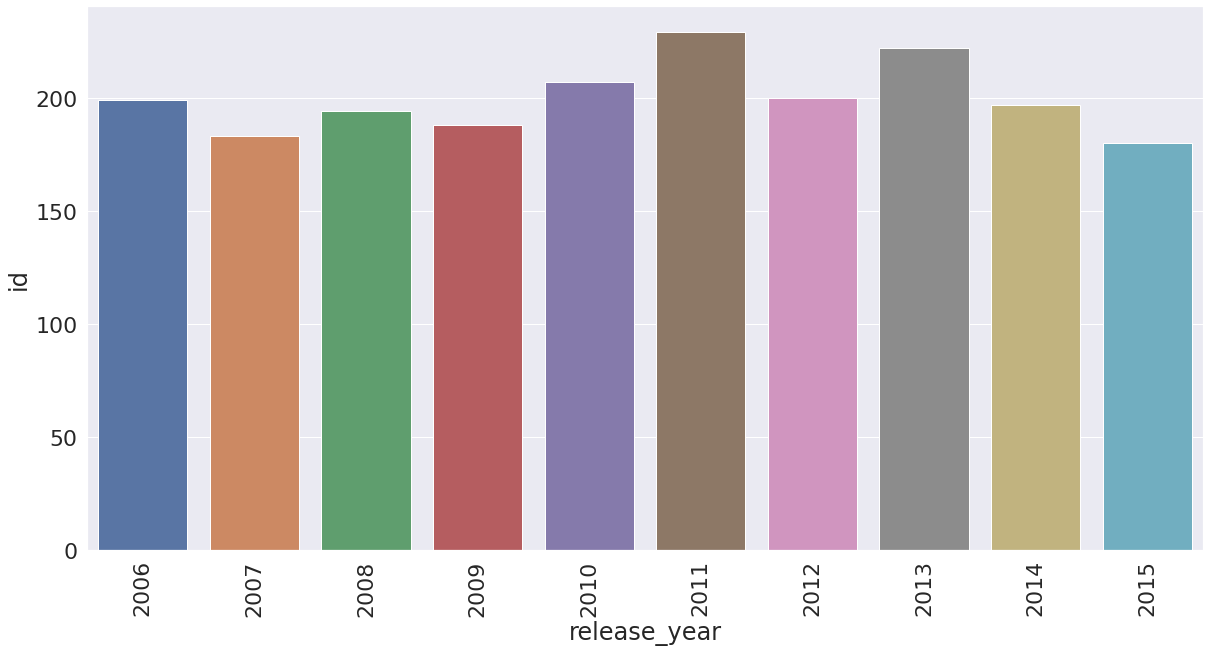

In [13]:
# ploting a barplot visualize last 10 years in terms of count of movies for each year
sns.set_style('whitegrid')
sns.set_context({"figure.figsize": (20, 10)})
sns.set(font_scale=2) # scale of font size of the plot
sns.barplot(x = top_10_year_count.index ,y= top_10_year_count['id'] )
plt.xticks(rotation=90);

> We can see here that the most year among these 10 years that movies had produced on is 2014. We also can see that since 2006 to 2009 there was a noticable increasing in the number of produced movies ut then decreasing happend in 2010 then another increasing occured until 2015 a decreasing happend in producing Movies.

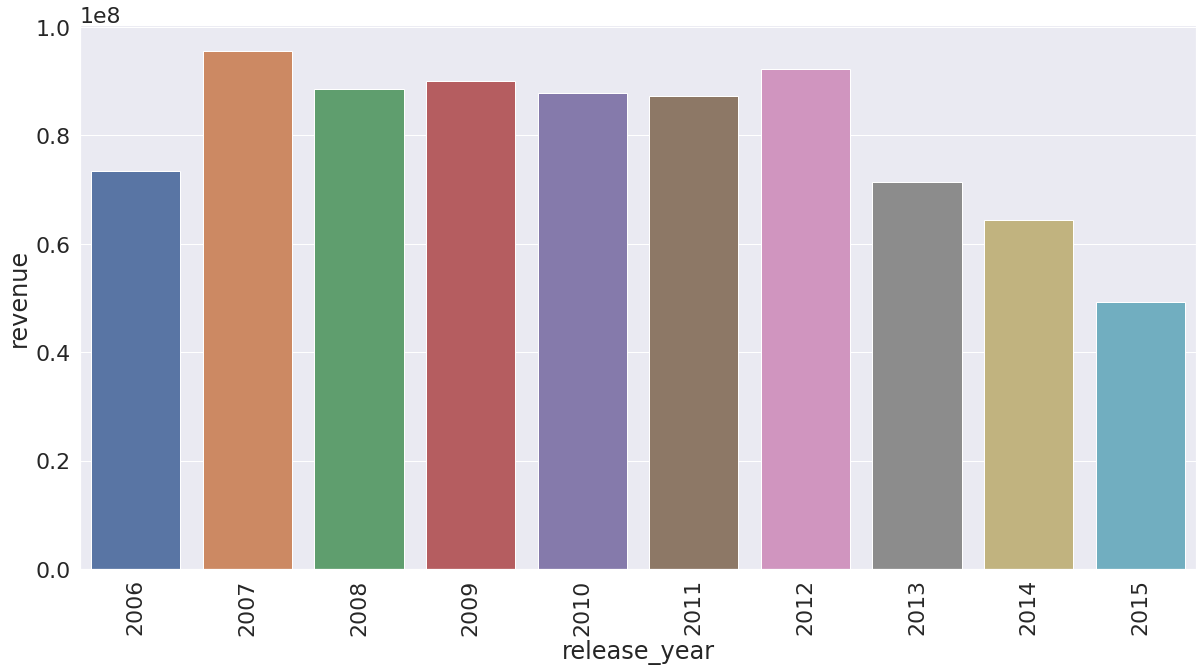

In [14]:
# ploting a barplot visualize last 10 years in terms of average of revenue for each year
sns.set_style('whitegrid')
sns.set_context({"figure.figsize": (20, 10)})
sns.set(font_scale=2) # scale of font size of the plot
sns.barplot(x = top_10_year_revenue.index ,y= top_10_year_revenue['revenue'] )
plt.xticks(rotation=90);

> Here in the revenue visualization there's very interesting case that revenue was better before 2011 than after this year. since 2011 the revenue of movies kept decreasing which is interesting specially that lately the movies making was improved than before. so we need to discover the growth of budget since that can explain this situation.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

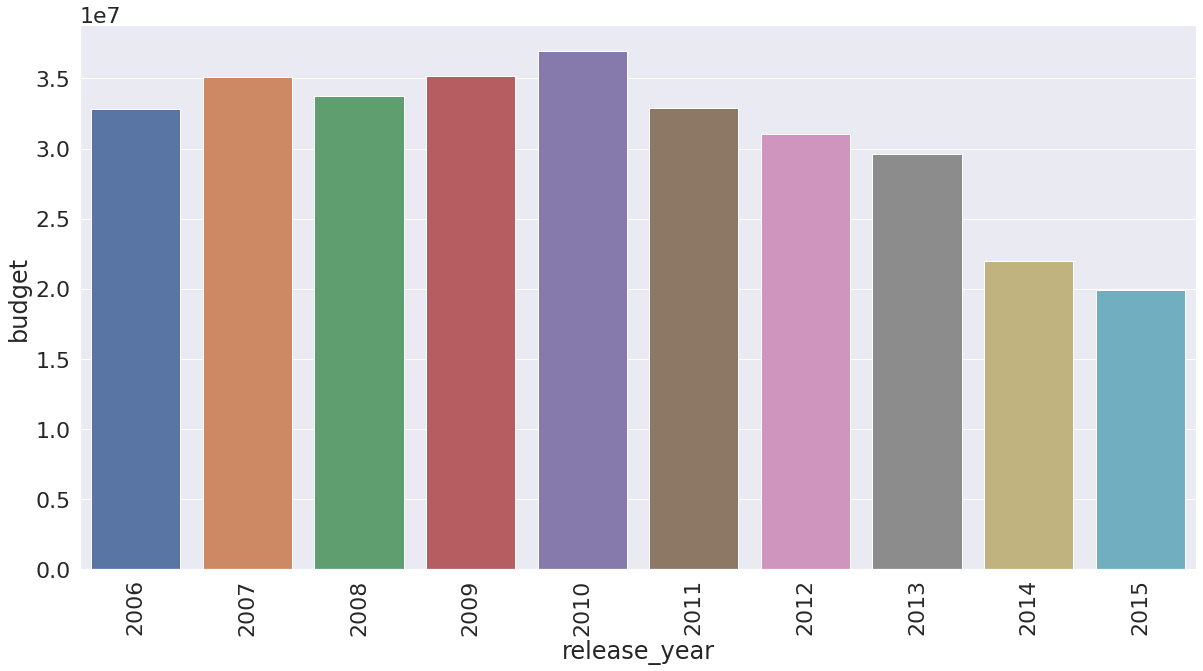

In [15]:
# ploting a barplot visualize last 10 years in terms of average of budget for each year
sns.set_style('whitegrid')
sns.set_context({"figure.figsize": (20, 10)})
sns.set(font_scale=2) # scale of font size of the plot
sns.barplot(x = top_10_year_budget.index ,y= top_10_year_budget['budget'] )
plt.xticks(rotation=90)

> The decreasing of the budget is noticable and of course this explains how the descreasing of revenue is making sense. Of Course when Movies Makers start to decrease there movies budget the quality will not be great and in terms of this the revenue wil of course decrease too.

## Research Question (2) :  What are the Top 10 Movies in terms of Movies count, Revenue, Budget, and Popularity and What are the empact on these movies regarding Revenue?

> Top 10 Movies in terms of 'revenue', 'Budget', and 'Rating'



### Top 10 movies in term of 'Revenue

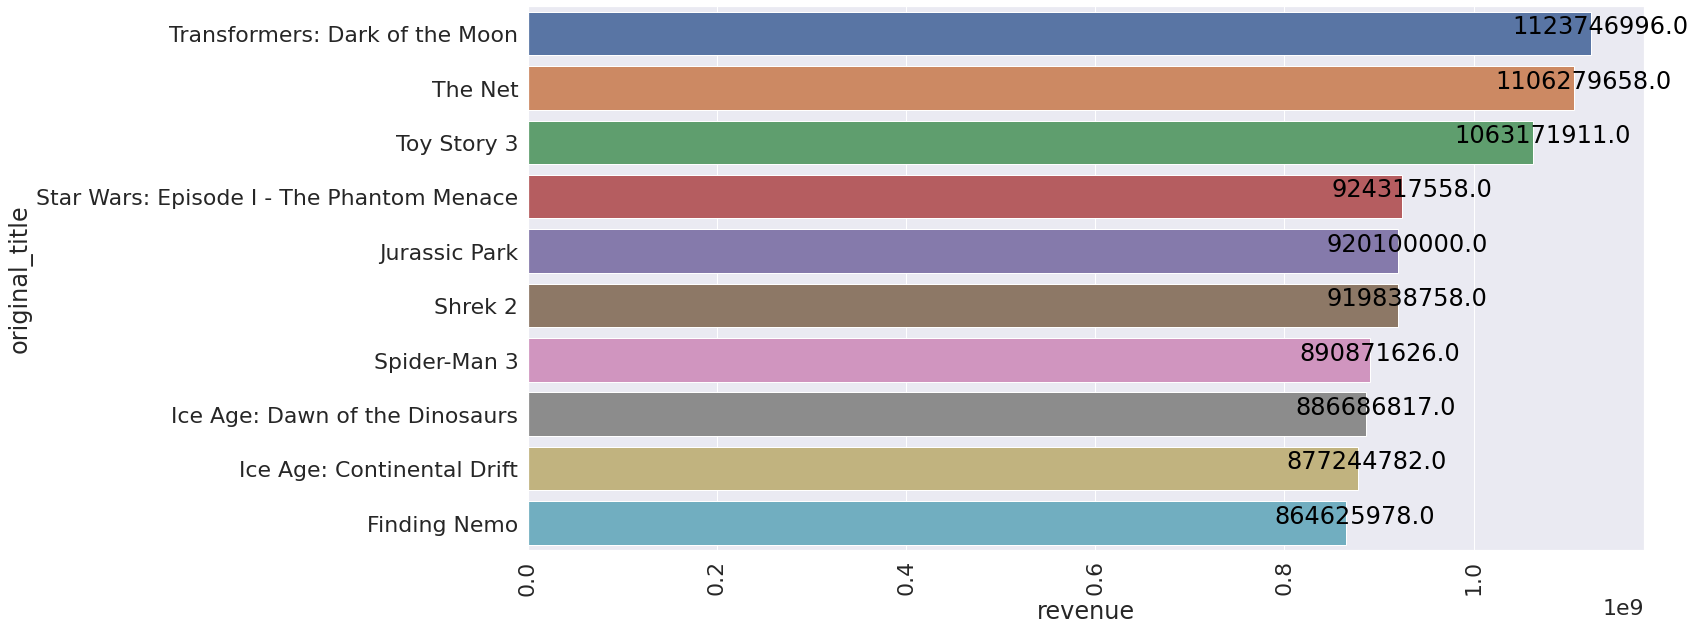

In [16]:
# ploting a barplot visualize top 10 movies in terms of revenue

top_10_movies_revenue = df.groupby('original_title').mean().sort_values('revenue',ascending=False).head(10).reset_index()
# plot properties
sns.set_style('whitegrid')
sns.set_context({"figure.figsize": (20, 10)})
sns.set(font_scale=2) # scale of font size of the plot
g = sns.barplot(x='revenue',y='original_title', data=top_10_movies_revenue )
# setting text on bars
for index, row in  top_10_movies_revenue.iterrows():
  g.text(row.revenue+10000000,row.name, round(row.revenue,2), color='black', ha="center")
plt.xticks(rotation=90);

### Top 10 movies in term of 'Rating

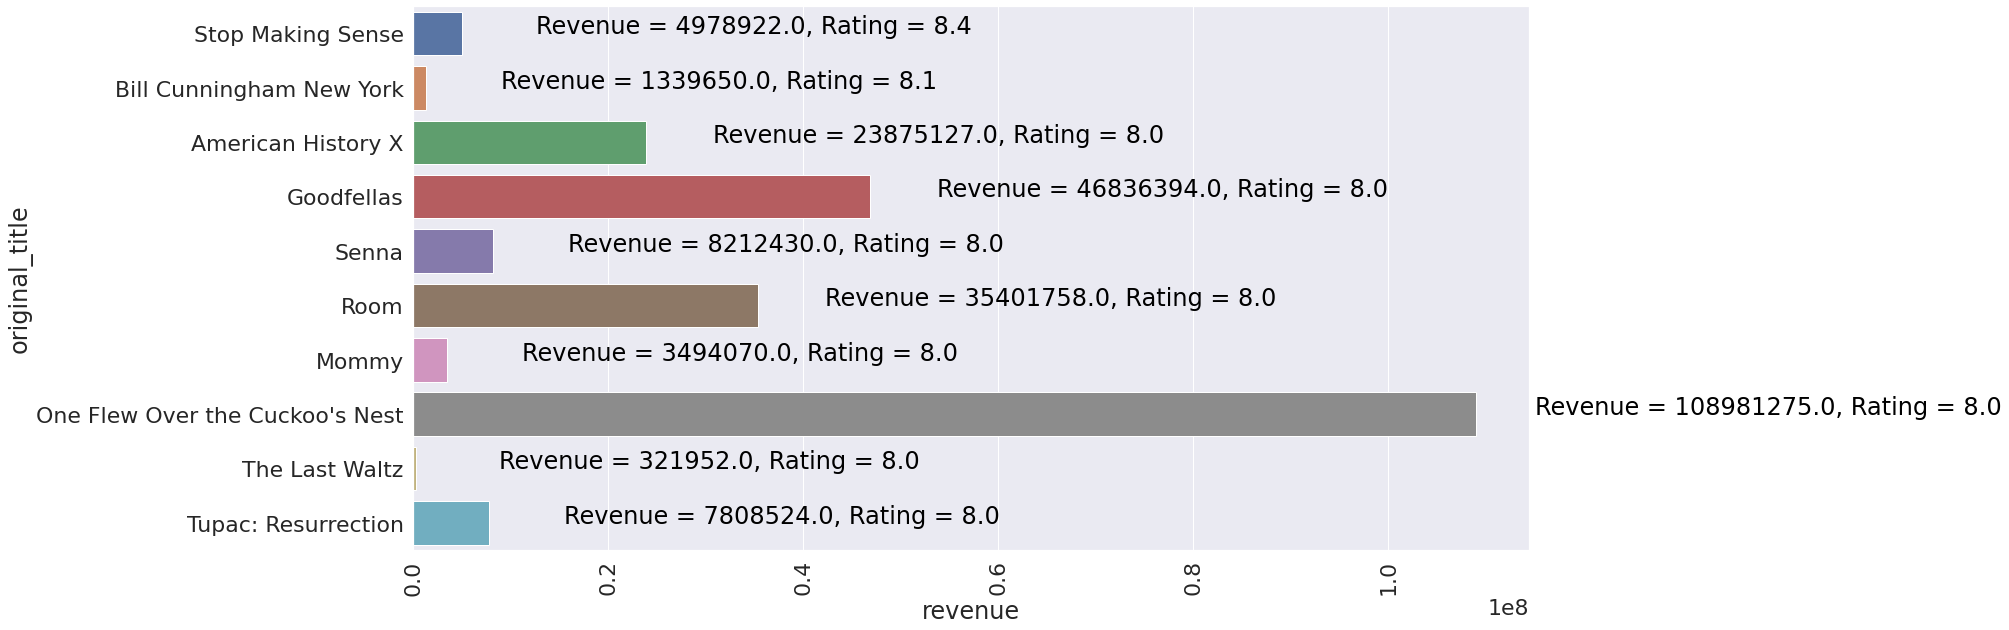

In [17]:
# ploting a barplot visualize top 10 movies in terms of rating
top_10_movies_rating = df.groupby('original_title').mean().sort_values('vote_average',ascending=False).head(10).reset_index()
# plot properties
sns.set_style('whitegrid')
sns.set_context({"figure.figsize": (20, 10)})
sns.set(font_scale=2) # scale of font size of the plot
g = sns.barplot(x='revenue',y='original_title', data=top_10_movies_rating )
# setting text on bars
for index, row in  top_10_movies_rating.iterrows():
  g.text(row.revenue+29999999,row.name,  'Revenue = '+str(round(row.revenue,2))+', Rating = '+str(round(row.vote_average,2)), color='black', ha="center")
plt.xticks(rotation=90);

> From our finding here we can see that Rating not factor that can determine with the revenuse since the top 10 rated movies differentiate in the revenue some of them are getting high revenue but some others are not.

### Top 10 movies in term of 'Budget'

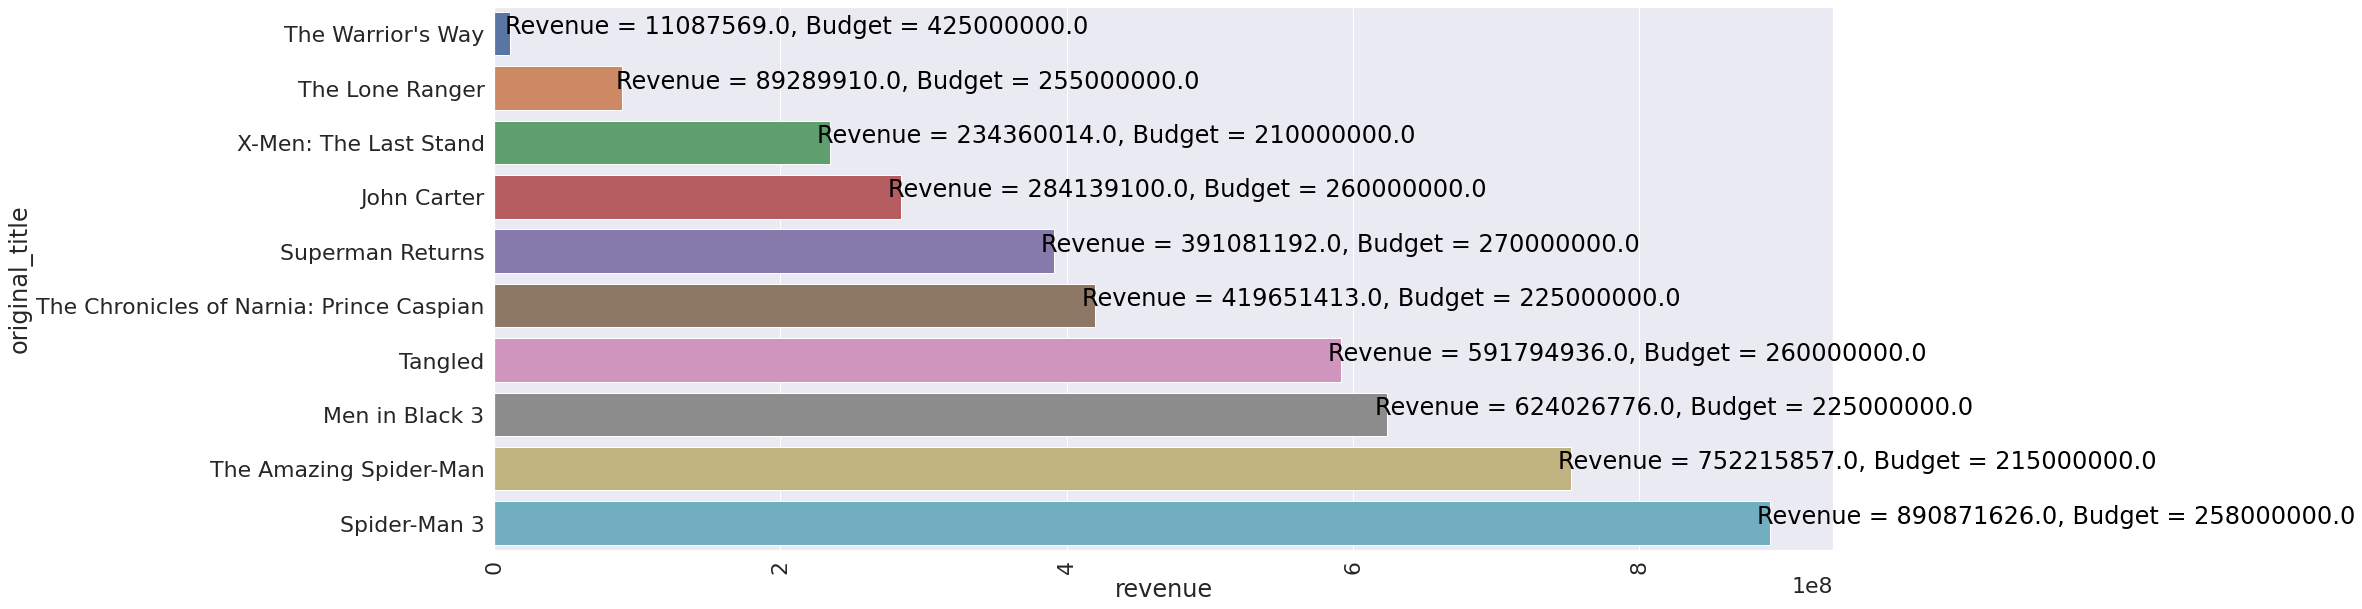

In [18]:
# ploting a barplot visualize top 10 movies in terms of budget


top_10_movies_budget = df.groupby('original_title').mean().sort_values('budget',ascending=False).head(10).sort_values('revenue').reset_index()
# plot properties
sns.set_style('whitegrid')
sns.set_context({"figure.figsize": (24, 10)})
sns.set(font_scale=2) # scale of font size of the plot
g = sns.barplot(x='revenue',y='original_title', data=top_10_movies_budget )
# setting text on bars
for index, row in  top_10_movies_budget.iterrows():
  g.text(row.revenue+199990000,row.name, 'Revenue = '+str(round(row.revenue,2))+', Budget = '+str(round(row.budget,2)), color='black', ha="center")
plt.xticks(rotation=90);

### Top 10 movies in term of 'Popularity'

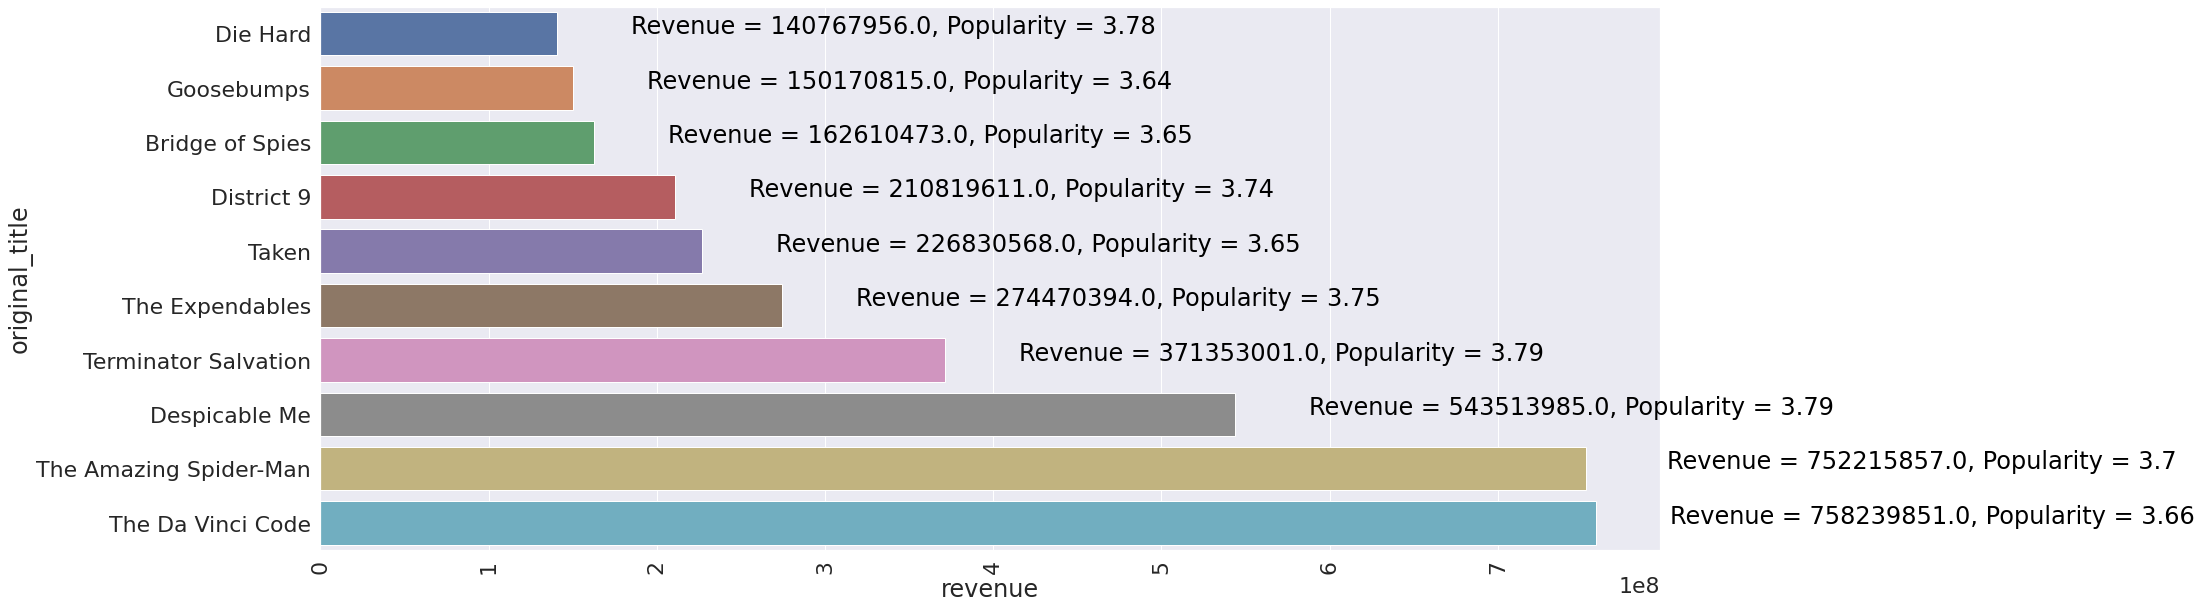

In [19]:
# ploting a barplot visualize top 10 movies in terms of popularity

top_10_movies_popularity = df.groupby('original_title').mean().sort_values('popularity',ascending=False).head(10).sort_values('revenue').reset_index()
# plot properties
sns.set_style('whitegrid')
sns.set_context({"figure.figsize": (24, 10)})
sns.set(font_scale=2) # scale of font size of the plot
g = sns.barplot(x='revenue',y='original_title', data=top_10_movies_popularity )
# setting text on bars
for index, row in  top_10_movies_popularity.iterrows():
  g.text(row.revenue+199990000,row.name, 'Revenue = '+str(round(row.revenue,2))+', Popularity = '+str(round(row.popularity,2)), color='black', ha="center")
plt.xticks(rotation=90);

### The Empact of budget on revenue in the top 10 movies in terms of 'Budget'

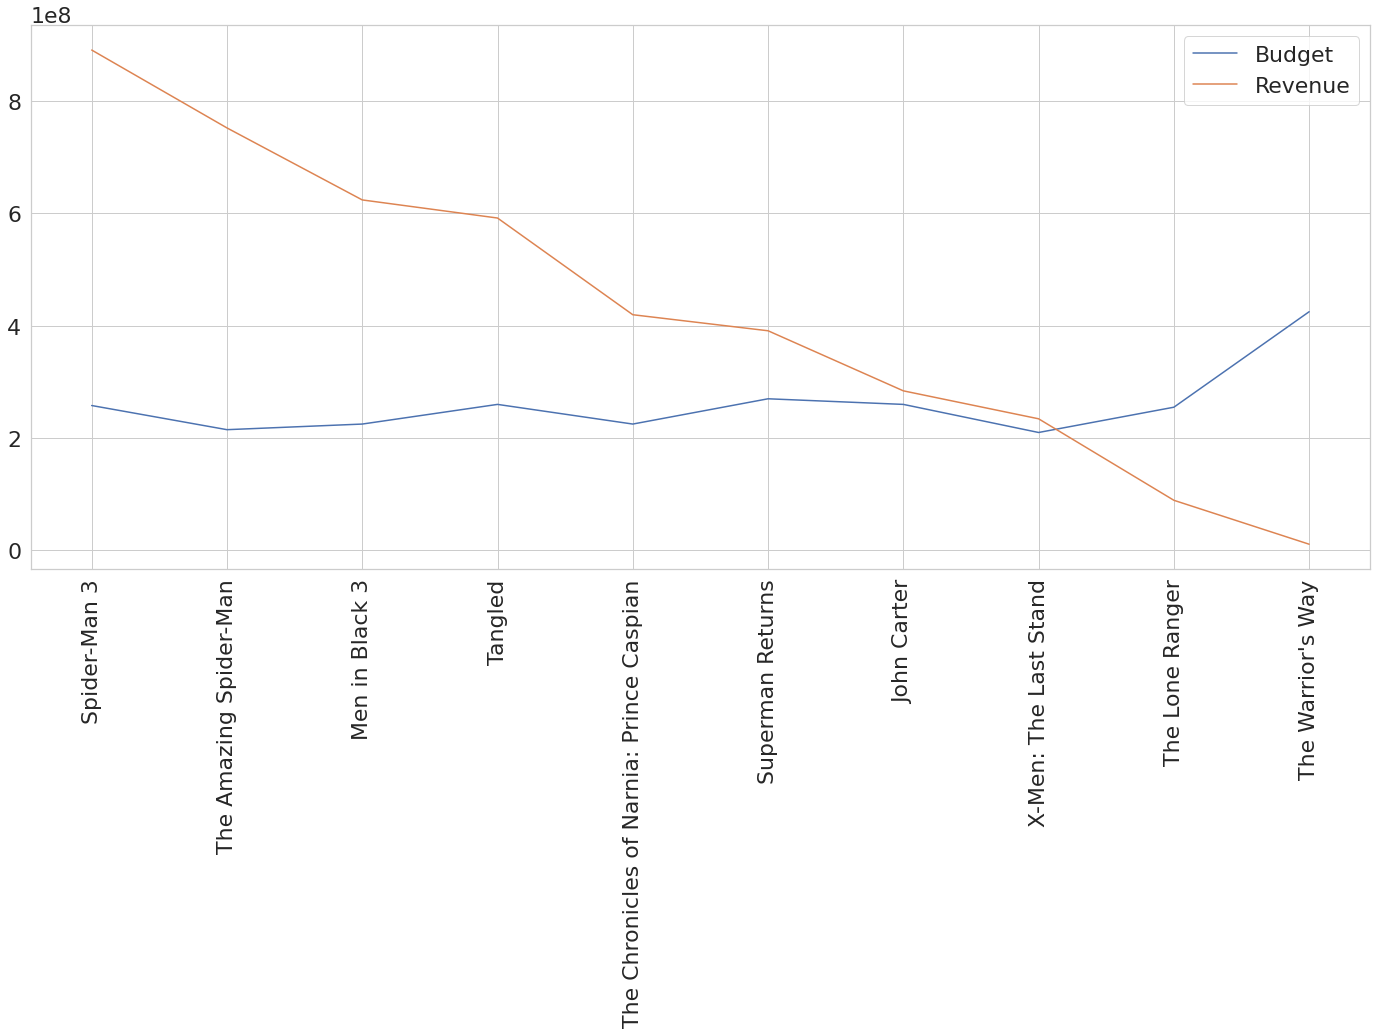

In [20]:
# ploting revenue againest budget for the top 10 movies with highest budget
sns.set_style('whitegrid')
sns.set_context({"figure.figsize": (24, 10)})
plt.plot(df.sort_values('budget',ascending=False).head(10).sort_values('revenue',ascending=False)['original_title'],df.sort_values('budget',ascending=False).head(10).sort_values('revenue',ascending=False)['budget'])
plt.plot(df.sort_values('budget',ascending=False).head(10).sort_values('revenue',ascending=False)['original_title'],df.sort_values('budget',ascending=False).head(10).sort_values('revenue',ascending=False)['revenue'])
plt.legend(['Budget','Revenue'])
plt.xticks(rotation=90)
plt.show()

> We can see from the previous plot that the revenue decreases with increasing of the budget. And this is make us notice that there's a relation ship between revenue and budget in reverse.

## Research Question (3) : What are the top 10 Actors in terms of highest revenue, budget, and popularity? and what are the empact of these factors on revenue ?

### Top 10 Actors/Actress Had Number of Movies in the dataset

#### preparing data

In [21]:
# getting the top 10 actors with highest number of movies associated with the dataset
cast_top_10_count = df_cast_expanded[['cast','id']].groupby('cast').count().sort_values('id',ascending=False).head(10)
cast_top_10_count

,id
cast,
Robert De Niro,58
Bruce Willis,47
Nicolas Cage,46
Samuel L. Jackson,43
Morgan Freeman,38
Sylvester Stallone,37
Robin Williams,36
Matt Damon,36
Tom Hanks,34


In [22]:
# calculating the mean of the revenue, budget, popularity and, Rating for the top 10 actors in terms of count of movies
top_10_cast_movie_count = df_cast_expanded[df_cast_expanded['cast'].isin(cast_top_10_count.index)]
top_10_cast_movie_count = top_10_cast_movie_count.groupby('cast').mean()
top_10_cast_movie_count

,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
cast,,,,,,,,
Bruce Willis,1.260711,5.178606e+07,1.351535e+08,108.574468,781.042553,5.980851,6.309823e+07,1.689008e+08
Dennis Quaid,0.696148,3.058529e+07,6.141666e+07,108.529412,219.794118,5.967647,3.555510e+07,7.570387e+07
Matt Damon,1.310826,5.135278e+07,1.262355e+08,119.500000,762.555556,6.422222,5.702723e+07,1.403463e+08
Morgan Freeman,0.876726,3.219737e+07,8.071144e+07,110.973684,398.026316,6.344737,3.748886e+07,1.020186e+08
Nicolas Cage,1.120262,4.889826e+07,1.057911e+08,111.347826,475.130435,5.926087,5.665816e+07,1.243623e+08
Robert De Niro,1.112805,3.538276e+07,8.401938e+07,115.603448,420.500000,6.289655,4.462608e+07,1.070469e+08
Robin Williams,0.990692,3.890000e+07,1.372131e+08,108.472222,432.750000,6.136111,4.747747e+07,1.791707e+08
Samuel L. Jackson,1.076694,4.575965e+07,1.196326e+08,109.906977,492.209302,6.037209,5.391620e+07,1.415165e+08
Sylvester Stallone,1.266380,4.328919e+07,1.211729e+08,105.891892,477.918919,5.975676,5.747019e+07,1.902320e+08


In [23]:
top_10_cast_movie_count.reset_index(inplace=True) # reseting the index of the dataframe

#### Average Revenue of top 10 Actors in terms of count of movies

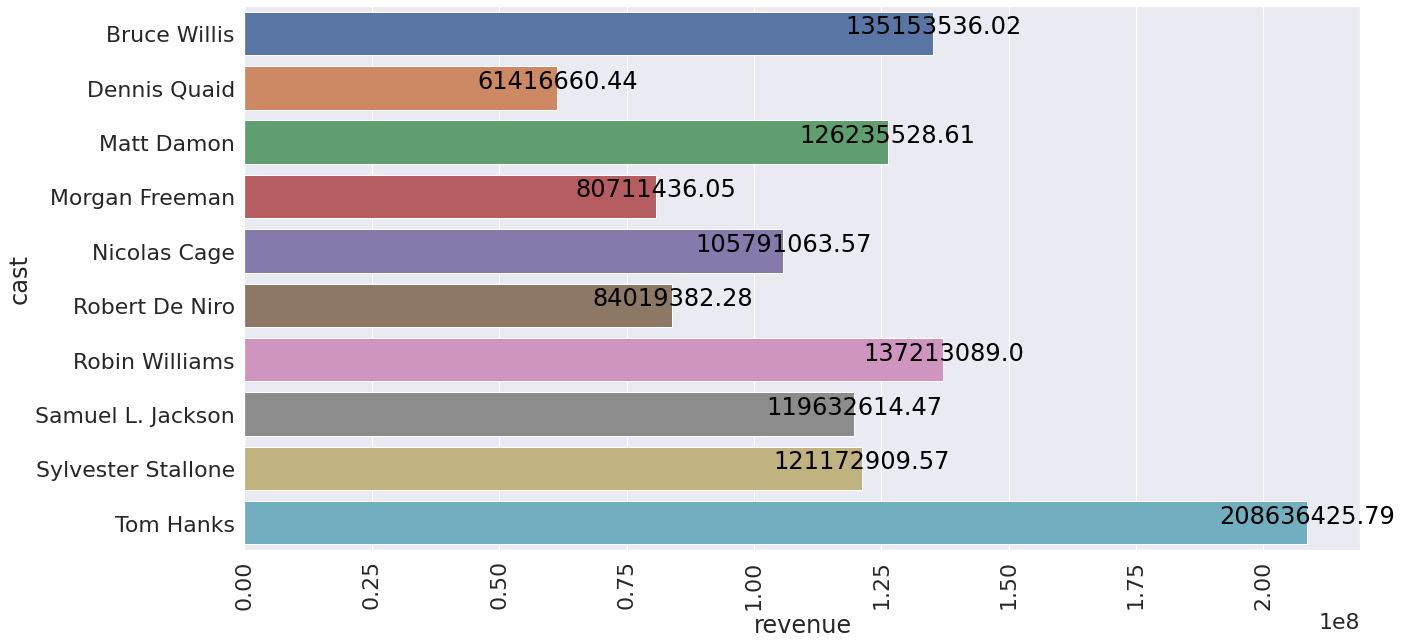

In [24]:
# the average revenue for top 10 actors in terms of movie counts
# plot properties
sns.set_style('whitegrid')
sns.set_context({"figure.figsize": (20, 10)})
sns.set(font_scale=2) # scale of font size of the plot
g = sns.barplot(x='revenue',y='cast', data=top_10_cast_movie_count)
# setting text on bars
for index, row in top_10_cast_movie_count.iterrows():
    g.text(row.revenue,row.name, round(row.revenue,2), color='black', ha="center")
plt.xticks(rotation=90);

#### Average Budget of top 10 Actors in terms of count of movies

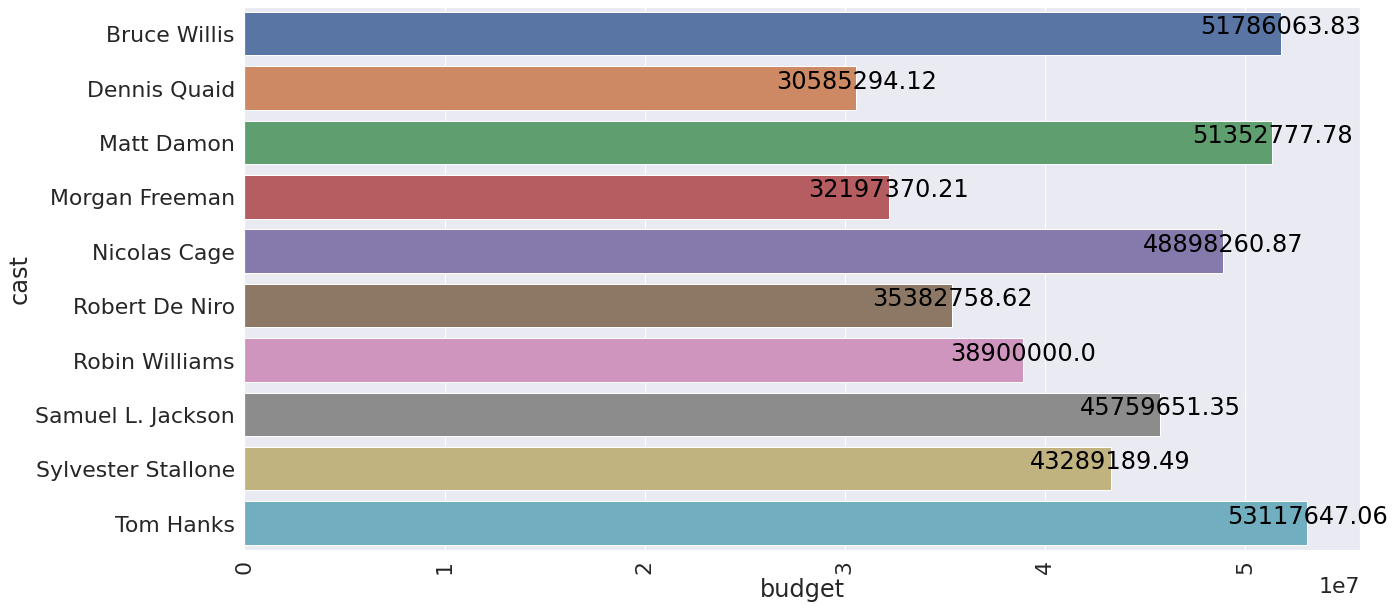

In [25]:
# the average budget for top 10 actors in terms of movie counts
# plot properties
sns.set_style('whitegrid')
sns.set_context({"figure.figsize": (20, 10)})
sns.set(font_scale=2) # scale of font size of the plot
g = sns.barplot(x='budget',y='cast', data=top_10_cast_movie_count)
# setting text on bars
for index, row in top_10_cast_movie_count.iterrows():
    g.text(row.budget,row.name, round(row.budget,2), color='black', ha="center")
plt.xticks(rotation=90);

#### Average Popularity of top 10 Actors in terms of count of movies

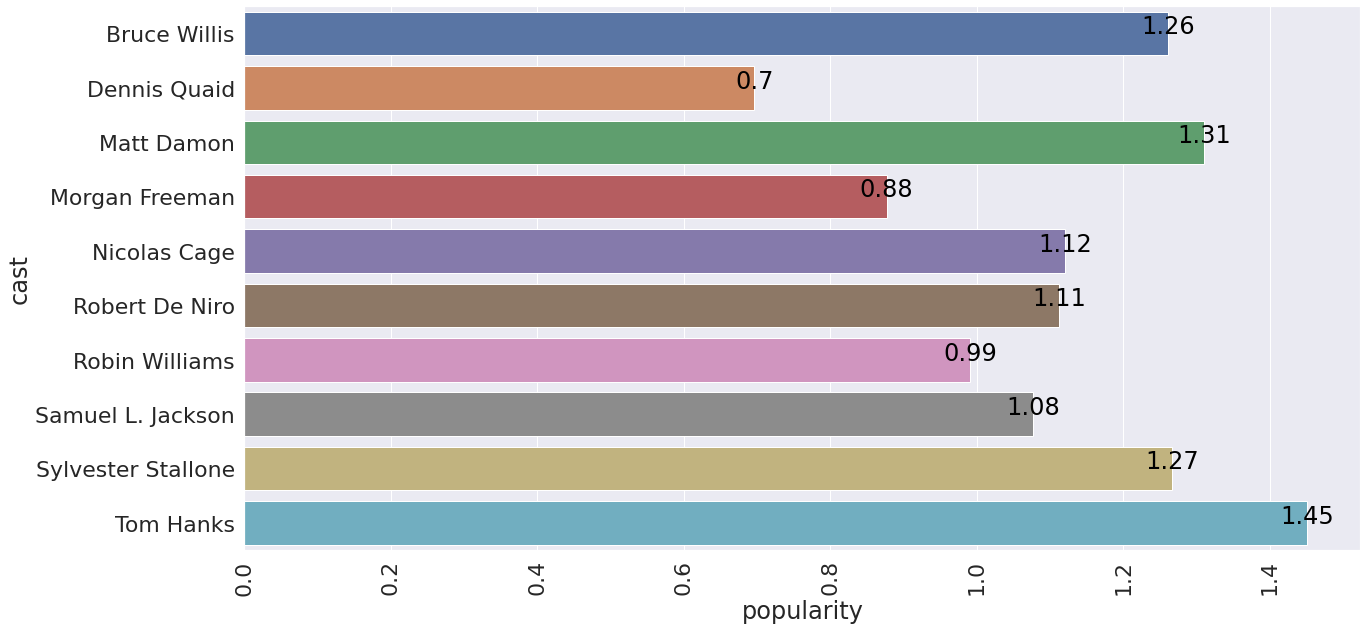

In [26]:
# the average popularity for top 10 actors in terms of movie counts
# plot properties
sns.set_style('whitegrid')
sns.set_context({"figure.figsize": (20, 10)})
sns.set(font_scale=2) # scale of font size of the plot
g = sns.barplot(x='popularity',y='cast', data=top_10_cast_movie_count)
# setting text on bars
for index, row in top_10_cast_movie_count.iterrows():
    g.text(row.popularity,row.name, round(row.popularity,2), color='black', ha="center")
plt.xticks(rotation=90);

#### Average Rating of top 10 Actors in terms of count of movies

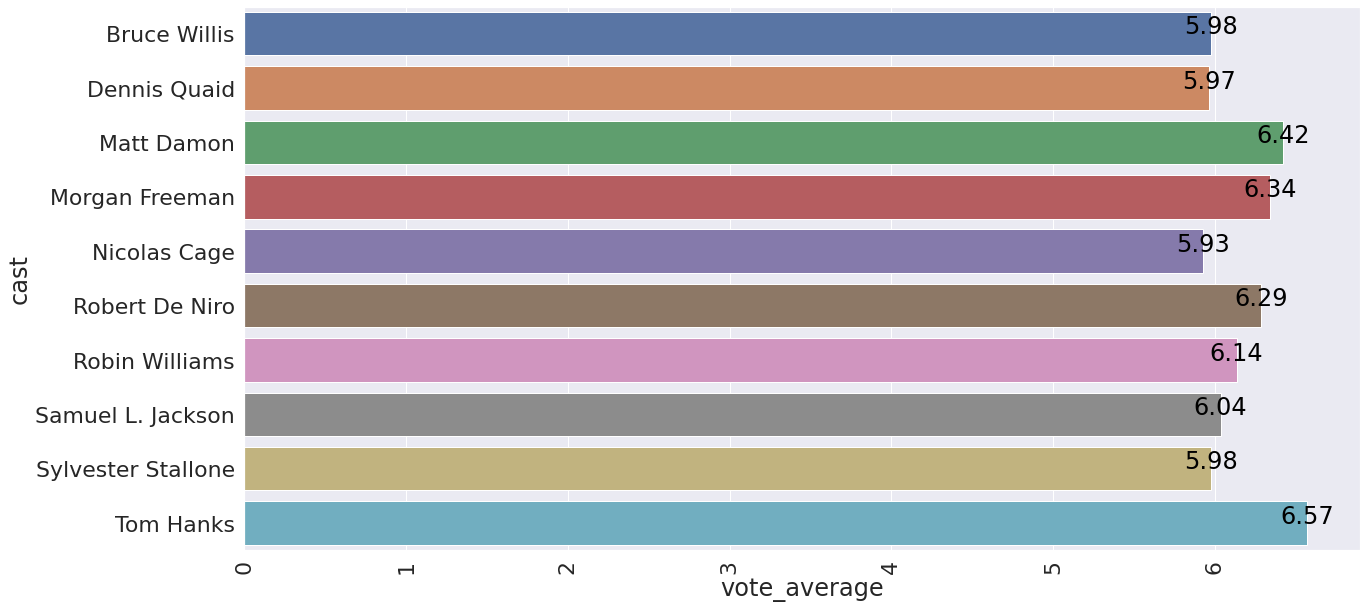

In [27]:
# the average rating for top 10 actors in terms of movie counts
# plot properties
sns.set_style('whitegrid')
sns.set_context({"figure.figsize": (20, 10)})
sns.set(font_scale=2) # scale of font size of the plot
g = sns.barplot(x='vote_average',y='cast', data=top_10_cast_movie_count)
# setting text on bars
for index, row in top_10_cast_movie_count.iterrows():
    g.text(row.vote_average,row.name, round(row.vote_average,2), color='black', ha="center")
plt.xticks(rotation=90);

### Top 10 Actors/Actress Had Most Revenue since 1960 to 2015

#### preparing data

> We can see here the most 10 actors that there movies got the highest revenue.

In [28]:
# grouping data by each actor/actress
cast_top_10_revenue = df_cast_expanded[['cast','revenue']].groupby('cast').sum().sort_values('revenue',ascending=False).head(10)
cast_top_10_revenue

,revenue
cast,
Tom Cruise,7424944416
Tom Hanks,7093638477
Cameron Diaz,6872169506
Eddie Murphy,6419006702
Bruce Willis,6352216193
Ben Stiller,5890610707
Will Smith,5883573851
Brad Pitt,5481007961
Angelina Jolie,5300902681


In [29]:
# calculating the mean of the revenue, budget, popularity and, Rating for the top 10 actors in terms of highest revenues
top_10_cast_movie_revenue = df_cast_expanded[df_cast_expanded['cast'].isin(cast_top_10_revenue.index)]
top_10_cast_movie_revenue = top_10_cast_movie_revenue.groupby('cast').mean()
top_10_cast_movie_revenue

,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
cast,,,,,,,,
Angelina Jolie,1.401790,7.473077e+07,2.038809e+08,112.653846,757.269231,6.115385,8.203331e+07,2.164266e+08
Ben Stiller,1.307672,5.731481e+07,2.181708e+08,102.555556,700.962963,6.085185,6.090809e+07,2.371789e+08
Brad Pitt,1.405173,6.230645e+07,1.768067e+08,125.451613,878.290323,6.564516,7.194869e+07,2.062290e+08
Bruce Willis,1.260711,5.178606e+07,1.351535e+08,108.574468,781.042553,5.980851,6.309823e+07,1.689008e+08
Cameron Diaz,1.384904,6.036207e+07,2.369714e+08,110.310345,709.241379,6.096552,6.708929e+07,2.694319e+08
Eddie Murphy,0.976450,5.851765e+07,1.887943e+08,100.676471,370.058824,5.676471,7.388153e+07,2.521291e+08
Samuel L. Jackson,1.076694,4.575965e+07,1.196326e+08,109.906977,492.209302,6.037209,5.391620e+07,1.415165e+08
Tom Cruise,1.488141,6.263333e+07,2.474981e+08,124.600000,771.700000,6.356667,7.835299e+07,3.304155e+08
Tom Hanks,1.451293,5.311765e+07,2.086364e+08,119.588235,869.705882,6.573529,6.328429e+07,2.583690e+08


In [30]:
top_10_cast_movie_revenue.sort_values('revenue',ascending=False,inplace=True)
top_10_cast_movie_revenue.reset_index(inplace=True)

#### Average Revenue of top 10 Actors in terms of highest revenue

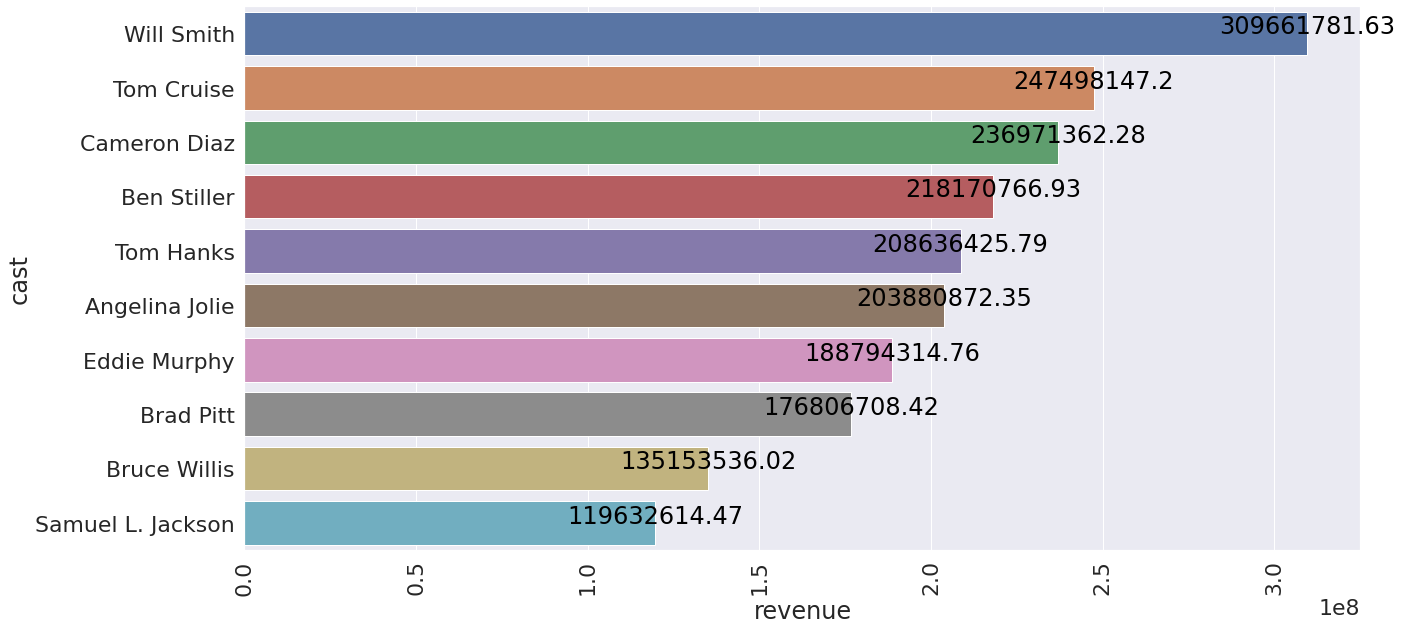

In [31]:
# plot properties
sns.set_style('whitegrid')
sns.set_context({"figure.figsize": (20, 10)})
sns.set(font_scale=2) # scale of font size of the plot
g = sns.barplot(x='revenue',y='cast', data=top_10_cast_movie_revenue)
# setting text on bars
for index, row in top_10_cast_movie_revenue.iterrows():
    g.text(row.revenue,row.name, round(row.revenue,2), color='black', ha="center")
plt.xticks(rotation=90);

#### Average budget of top 10 Actors in terms of highest revenue

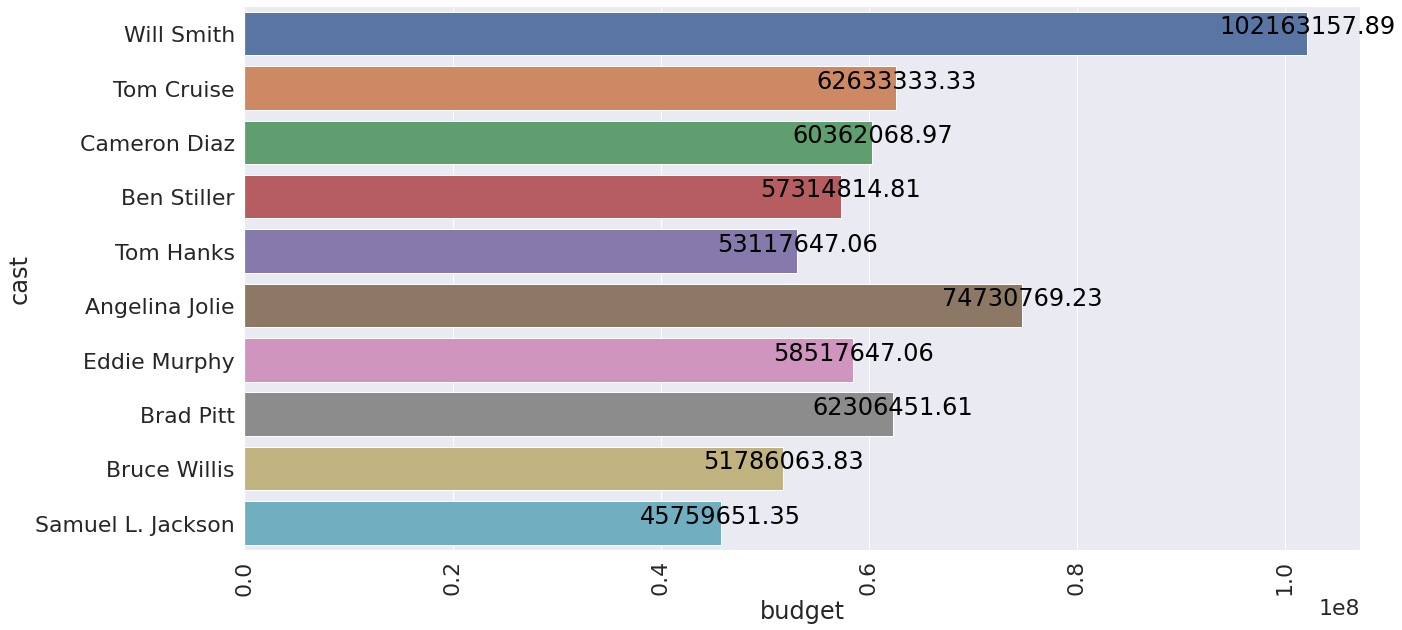

In [32]:
# Average budget of top 10 Actors in terms of highest revenue
# plot properties
sns.set_style('whitegrid')
sns.set_context({"figure.figsize": (20, 10)})
sns.set(font_scale=2) # scale of font size of the plot
g = sns.barplot(x='budget',y='cast', data=top_10_cast_movie_revenue)
# setting text on bars
for index, row in top_10_cast_movie_revenue.iterrows():
    g.text(row.budget,row.name, round(row.budget,2), color='black', ha="center")
plt.xticks(rotation=90);

#### Average popularity of top 10 Actors in terms of highest revenue

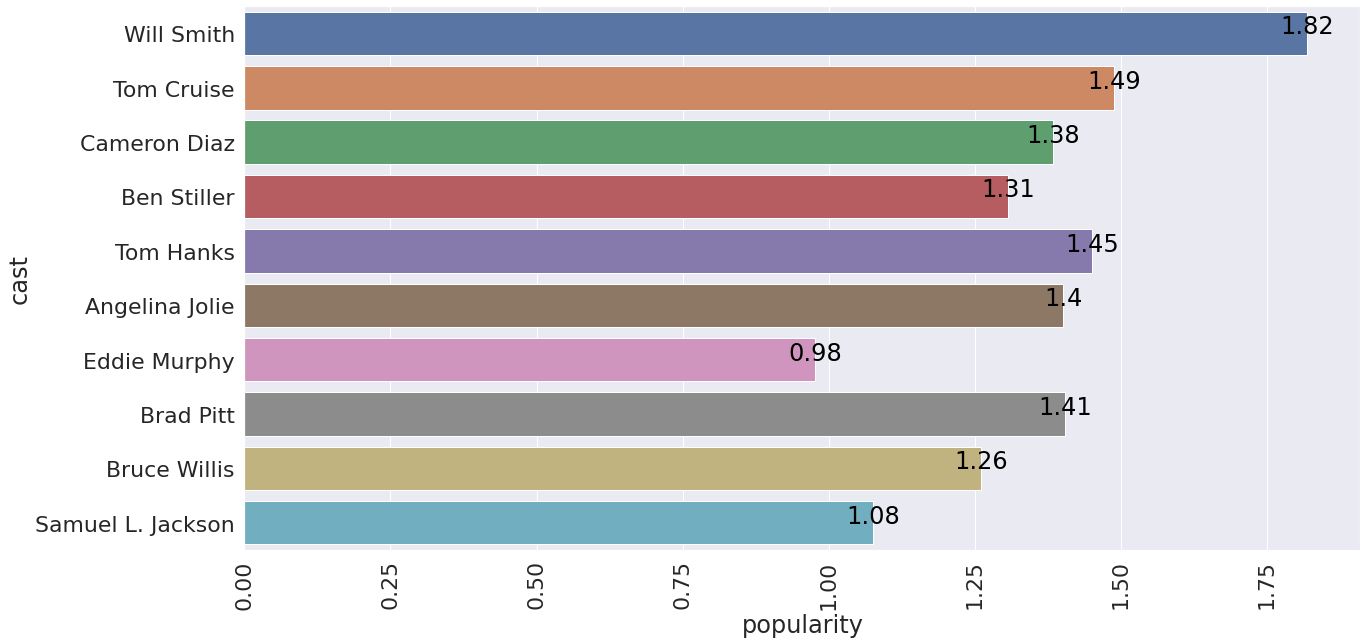

In [33]:
# Average popularity of top 10 Actors in terms of highest revenue
# plot properties
sns.set_style('whitegrid')
sns.set_context({"figure.figsize": (20, 10)})
sns.set(font_scale=2) # scale of font size of the plot
g = sns.barplot(x='popularity',y='cast', data=top_10_cast_movie_revenue)
# setting text on bars
for index, row in top_10_cast_movie_revenue.iterrows():
    g.text(row.popularity,row.name, round(row.popularity,2), color='black', ha="center")
plt.xticks(rotation=90);

#### Average Rating of top 10 Actors in terms of highest revenue

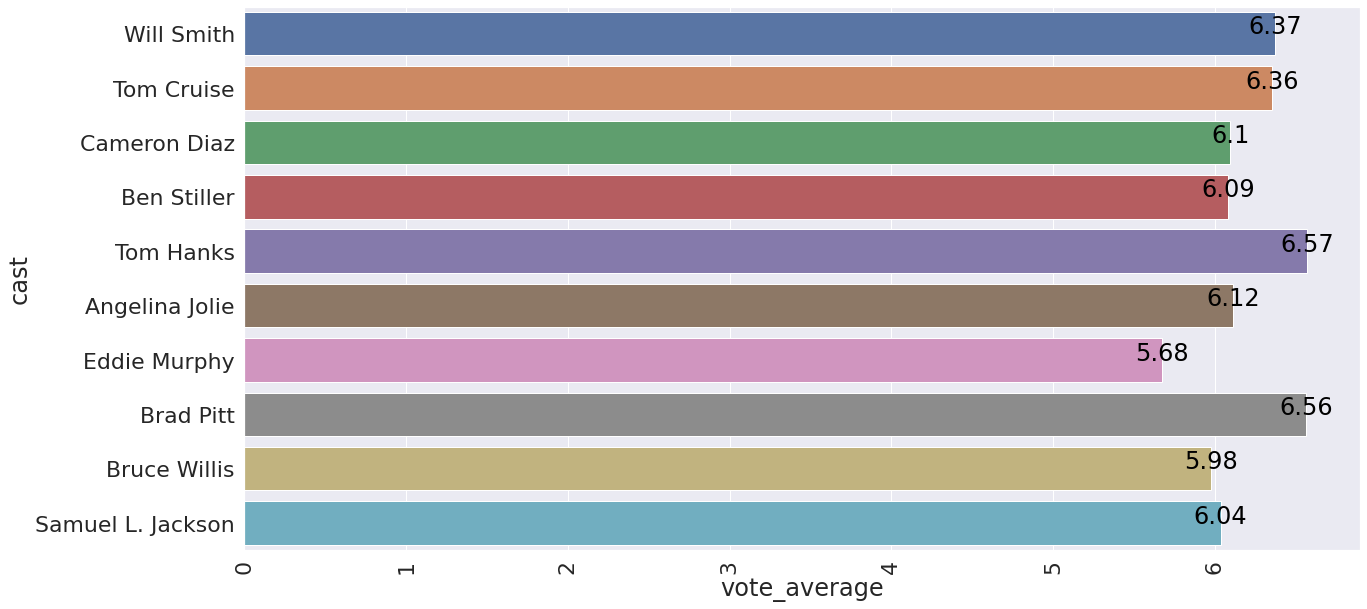

In [34]:
# Average Rating of top 10 Actors in terms of highest revenue
# plot properties
sns.set_style('whitegrid')
sns.set_context({"figure.figsize": (20, 10)})
sns.set(font_scale=2) # scale of font size of the plot
g = sns.barplot(x='vote_average',y='cast', data=top_10_cast_movie_revenue)
# setting text on bars
for index, row in top_10_cast_movie_revenue.iterrows():
    g.text(row.vote_average,row.name, round(row.vote_average,2), color='black', ha="center")
plt.xticks(rotation=90);

###  Top 10 Actors/Actress Had Most Budget since 1960 to 2015

#### preparing data

In [35]:
# grouping dataframe with each actor/actress in terms of highest budget
cast_top_10_budget  = df_cast_expanded[['cast','budget']].groupby('cast').sum().sort_values('budget',ascending=False).head(10)
cast_top_10_budget

,budget
cast,
Bruce Willis,2433945000
Nicolas Cage,2249320000
Robert De Niro,2052200000
Eddie Murphy,1989600000
Samuel L. Jackson,1967665008
Angelina Jolie,1943000000
Will Smith,1941100000
Brad Pitt,1931500000
Tom Cruise,1879000000


In [36]:
top_10_cast_movie_budget = df_cast_expanded[df_cast_expanded['cast'].isin(cast_top_10_budget.index)]
top_10_cast_movie_budget = top_10_cast_movie_budget.groupby('cast').mean()
top_10_cast_movie_budget

,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
cast,,,,,,,,
Angelina Jolie,1.401790,7.473077e+07,2.038809e+08,112.653846,757.269231,6.115385,8.203331e+07,2.164266e+08
Brad Pitt,1.405173,6.230645e+07,1.768067e+08,125.451613,878.290323,6.564516,7.194869e+07,2.062290e+08
Bruce Willis,1.260711,5.178606e+07,1.351535e+08,108.574468,781.042553,5.980851,6.309823e+07,1.689008e+08
Eddie Murphy,0.976450,5.851765e+07,1.887943e+08,100.676471,370.058824,5.676471,7.388153e+07,2.521291e+08
Matt Damon,1.310826,5.135278e+07,1.262355e+08,119.500000,762.555556,6.422222,5.702723e+07,1.403463e+08
Nicolas Cage,1.120262,4.889826e+07,1.057911e+08,111.347826,475.130435,5.926087,5.665816e+07,1.243623e+08
Robert De Niro,1.112805,3.538276e+07,8.401938e+07,115.603448,420.500000,6.289655,4.462608e+07,1.070469e+08
Samuel L. Jackson,1.076694,4.575965e+07,1.196326e+08,109.906977,492.209302,6.037209,5.391620e+07,1.415165e+08
Tom Cruise,1.488141,6.263333e+07,2.474981e+08,124.600000,771.700000,6.356667,7.835299e+07,3.304155e+08


In [37]:
top_10_cast_movie_budget.reset_index(inplace=True)

#### Average Revenue of top 10 Actors in terms of highest Budget

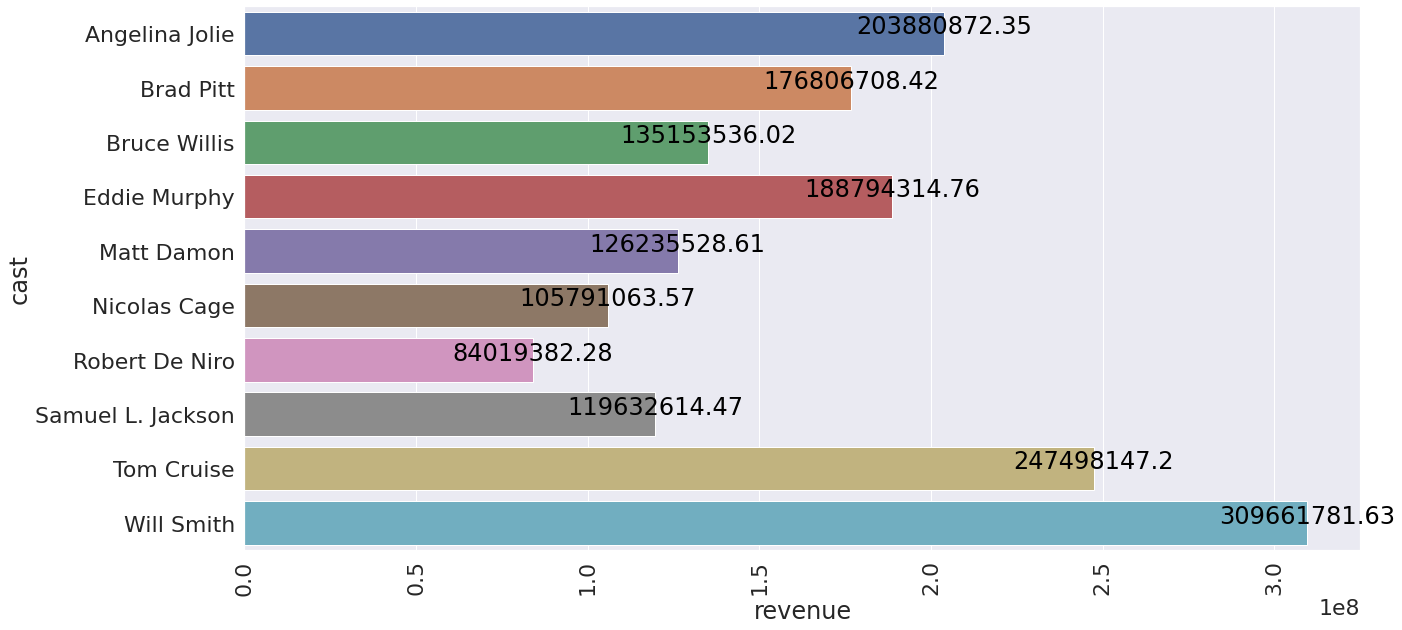

In [38]:
# plot properties
sns.set_style('whitegrid') 
sns.set_context({"figure.figsize": (20, 10)})
sns.set(font_scale=2) # scale of font size of the plot
g = sns.barplot(x='revenue',y='cast', data=top_10_cast_movie_budget)
# setting text on bars
for index, row in top_10_cast_movie_budget.iterrows():
    g.text(row.revenue,row.name, round(row.revenue,2), color='black', ha="center")
plt.xticks(rotation=90);

#### Average Budget of top 10 Actors in terms of highest Budget

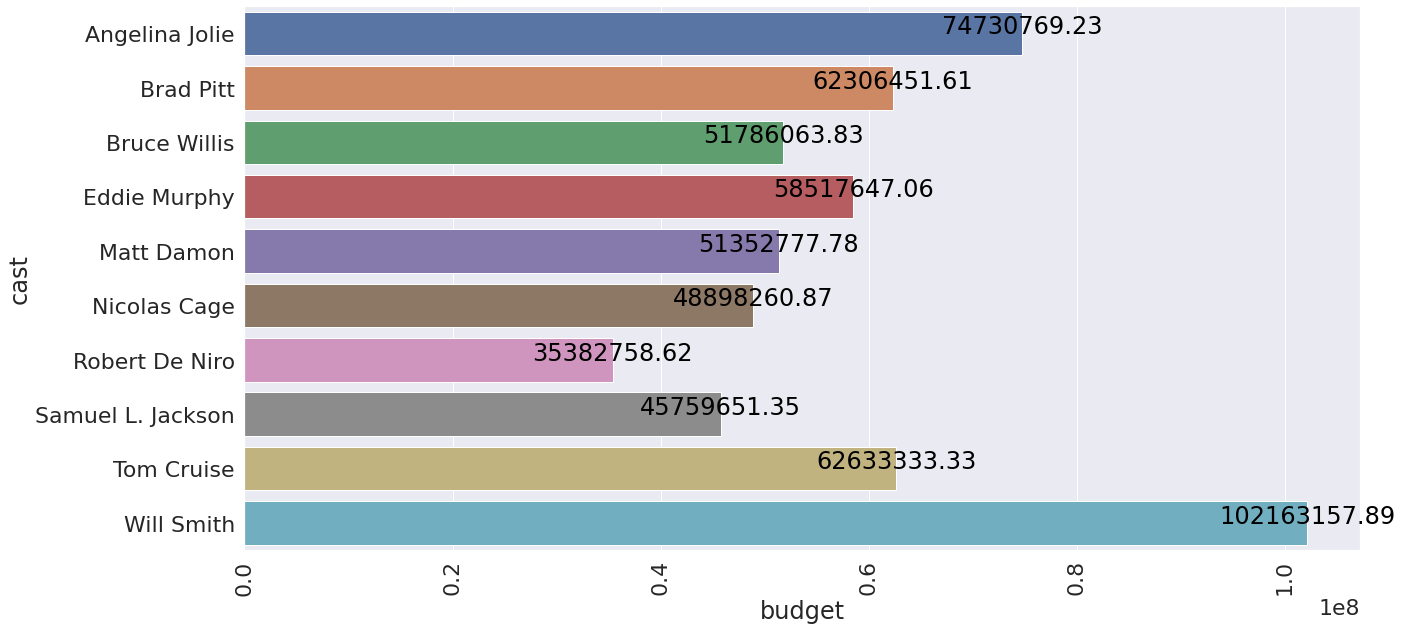

In [39]:
# plot properties
sns.set_style('whitegrid')
sns.set_context({"figure.figsize": (20, 10)})
sns.set(font_scale=2) # scale of font size of the plot
g = sns.barplot(x='budget',y='cast', data=top_10_cast_movie_budget)
# setting text on bars
for index, row in top_10_cast_movie_budget.iterrows():
    g.text(row.budget,row.name, round(row.budget,2), color='black', ha="center")
plt.xticks(rotation=90);

#### Average Rating of top 10 Actors in terms of highest Budget

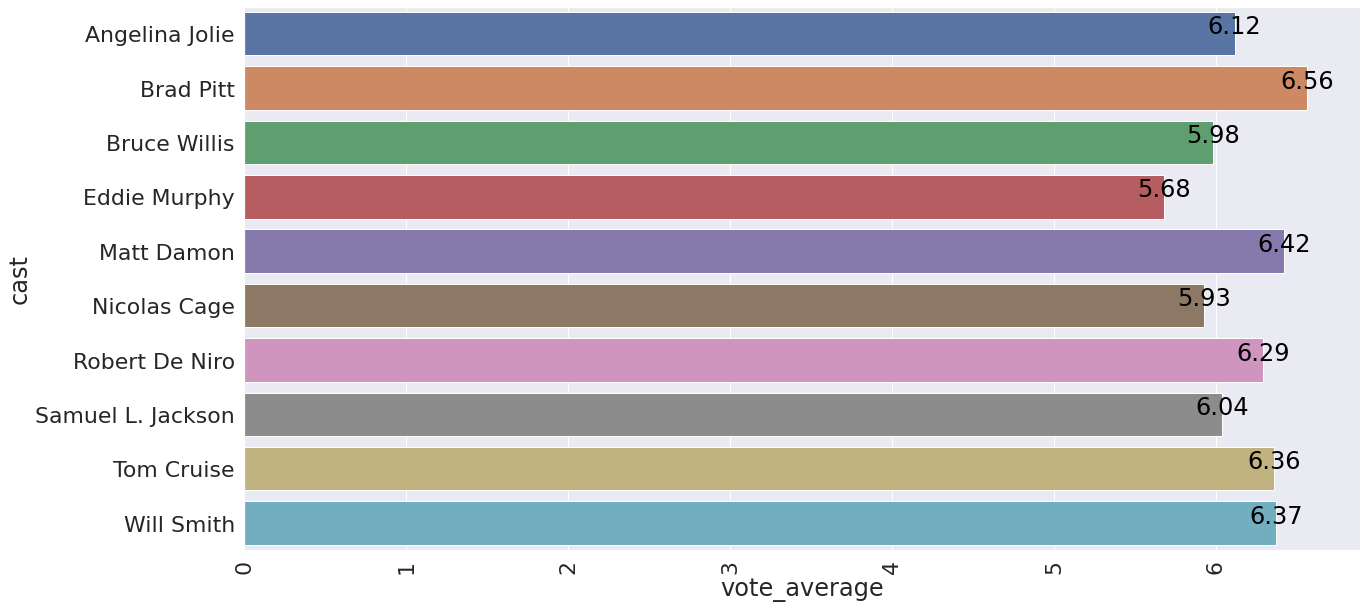

In [40]:
# plot properties
sns.set_style('whitegrid')
sns.set_context({"figure.figsize": (20, 10)})
sns.set(font_scale=2) # scale of font size of the plot
g = sns.barplot(x='vote_average',y='cast', data=top_10_cast_movie_budget)
# setting text on bars
for index, row in top_10_cast_movie_budget.iterrows():
    g.text(row.vote_average,row.name, round(row.vote_average,2), color='black', ha="center")
plt.xticks(rotation=90);

#### Average Popularity of top 10 Actors in terms of highest Budget

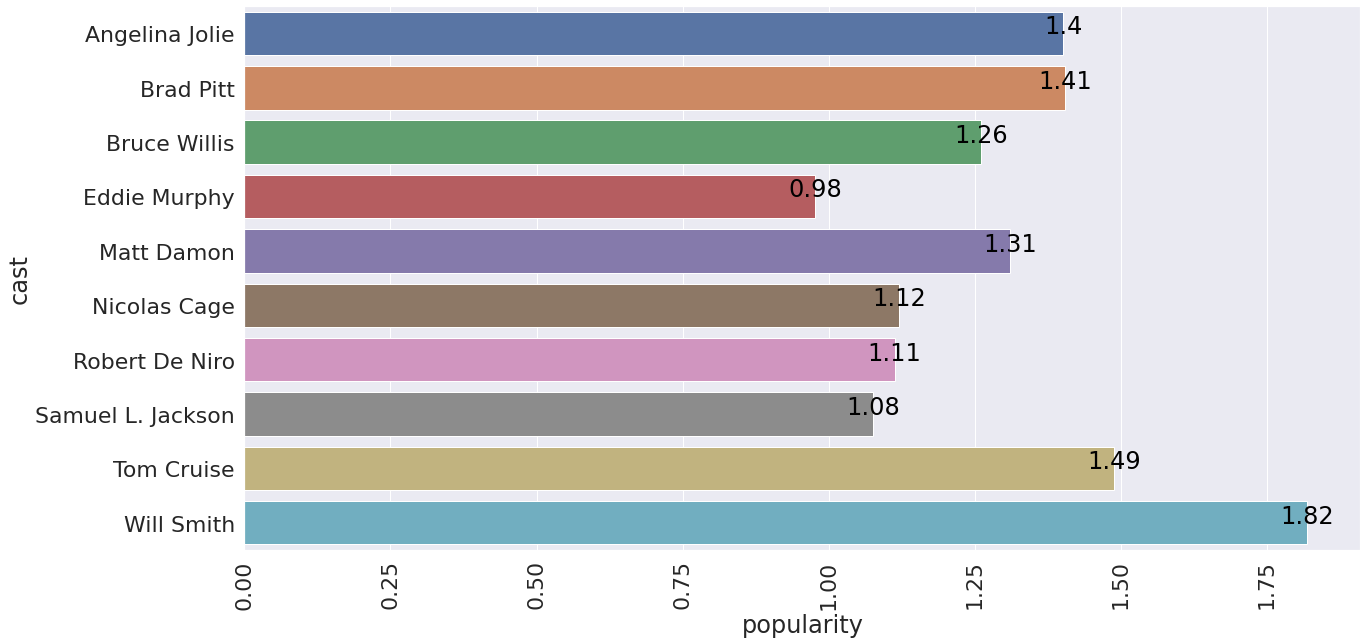

In [41]:
# plot properties
sns.set_style('whitegrid')
sns.set_context({"figure.figsize": (20, 10)})
sns.set(font_scale=2) # scale of font size of the plot
g = sns.barplot(x='popularity',y='cast', data=top_10_cast_movie_budget)
# setting text on bars
for index, row in top_10_cast_movie_budget.iterrows():
    g.text(row.popularity,row.name, round(row.popularity,2), color='black', ha="center")
plt.xticks(rotation=90);

## Research Question (4) : What are the empact of genres in revenue and budget?

### Exploring Most Genres in Revenue, Popularity, and Budget

#### preparing data

In [42]:
# grouping dataframe with each genre and calculate the mean for each numeric column in the group
genres = df_genres_expanded.groupby('genres').mean().sort_values('popularity',ascending=False)
genres

,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
genres,,,,,,,,
Animation,1.336465,6.431156e+07,1.977484e+08,88.470320,638.123288,6.300000,6.990134e+07,2.251560e+08
Fantasy,1.198423,5.304079e+07,1.405580e+08,103.878282,563.064439,5.936993,6.182099e+07,1.695528e+08
Adventure,1.181404,5.362759e+07,1.432246e+08,109.079893,560.035952,6.021971,6.473026e+07,1.914375e+08
Science Fiction,1.103882,4.196411e+07,1.007498e+08,105.280000,554.948571,5.888190,5.166848e+07,1.335796e+08
Family,1.084457,4.909140e+07,1.466339e+08,97.245763,449.317797,6.046186,5.645594e+07,1.818938e+08
Action,1.053208,4.321638e+07,1.059565e+08,108.541451,496.565630,5.938083,5.247147e+07,1.409881e+08
War,0.954348,3.611623e+07,8.119169e+07,126.515873,393.246032,6.500794,4.891143e+07,1.197933e+08
Thriller,0.953548,3.010931e+07,7.411856e+07,107.701031,390.173785,6.007364,3.653322e+07,1.026118e+08
Mystery,0.924395,2.802228e+07,7.136079e+07,109.853535,342.694444,6.135101,3.439678e+07,9.301576e+07


In [43]:
genres.reset_index(inplace=True)

#### Average Popularity of Movies in Each Genre

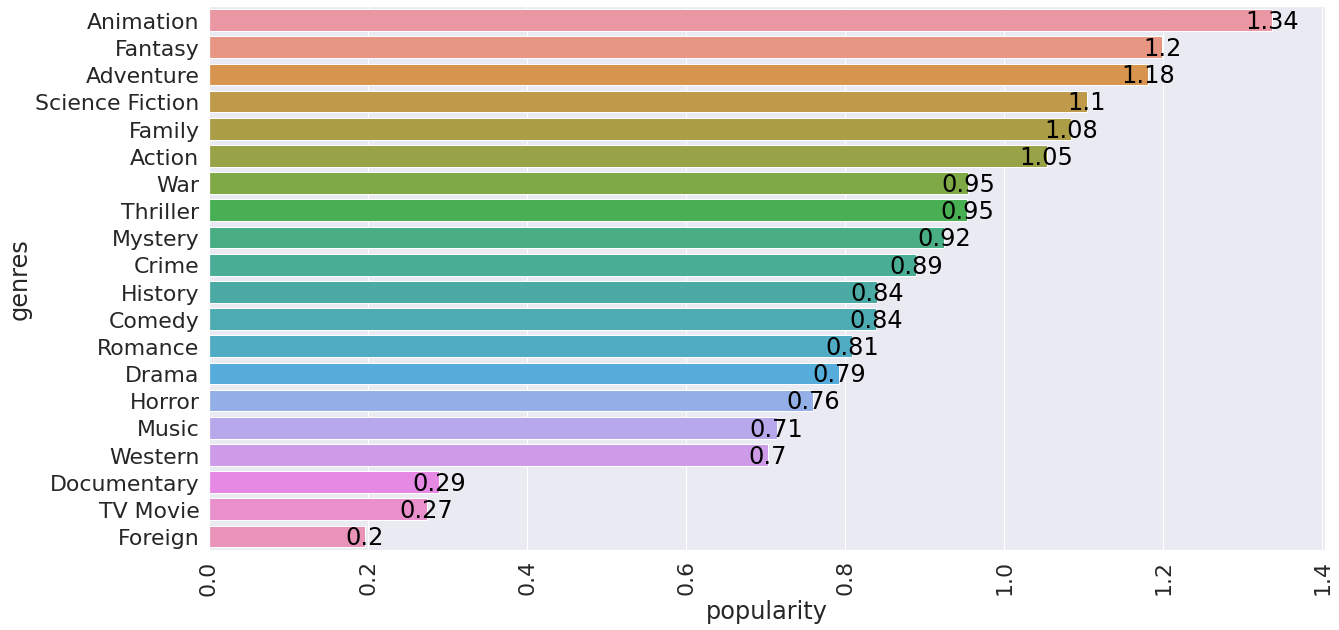

In [44]:

# plot properties
sns.set_style('whitegrid')
sns.set_context({"figure.figsize": (20, 10)})
sns.set(font_scale=2) # scale of font size of the plot
g = sns.barplot(x='popularity',y='genres', data=genres)
# setting text on bars
for index, row in genres.iterrows():
    g.text(row.popularity,row.name+0.3, round(row.popularity,2), color='black', ha="center")
plt.xticks(rotation=90);

> We can see here that the most 5 popular genres are Animation, Adventures, Fantasy, Action and Science Fiction

#### Average Budget of Movies in Each Genre

In [45]:
genres = genres.sort_values('budget',ascending=False).reset_index(drop=True)
genres


,genres,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
0,Animation,1.336465,6.431156e+07,1.977484e+08,88.470320,638.123288,6.300000,6.990134e+07,2.251560e+08
1,Adventure,1.181404,5.362759e+07,1.432246e+08,109.079893,560.035952,6.021971,6.473026e+07,1.914375e+08
2,Fantasy,1.198423,5.304079e+07,1.405580e+08,103.878282,563.064439,5.936993,6.182099e+07,1.695528e+08
3,Family,1.084457,4.909140e+07,1.466339e+08,97.245763,449.317797,6.046186,5.645594e+07,1.818938e+08
4,Action,1.053208,4.321638e+07,1.059565e+08,108.541451,496.565630,5.938083,5.247147e+07,1.409881e+08
5,Science Fiction,1.103882,4.196411e+07,1.007498e+08,105.280000,554.948571,5.888190,5.166848e+07,1.335796e+08
6,Western,0.703008,3.935690e+07,5.952036e+07,118.050000,258.350000,6.356667,5.041959e+07,1.087172e+08
7,War,0.954348,3.611623e+07,8.119169e+07,126.515873,393.246032,6.500794,4.891143e+07,1.197933e+08
8,History,0.840579,3.600390e+07,7.055427e+07,129.774436,341.563910,6.487218,4.614754e+07,9.750951e+07
9,Thriller,0.953548,3.010931e+07,7.411856e+07,107.701031,390.173785,6.007364,3.653322e+07,1.026118e+08


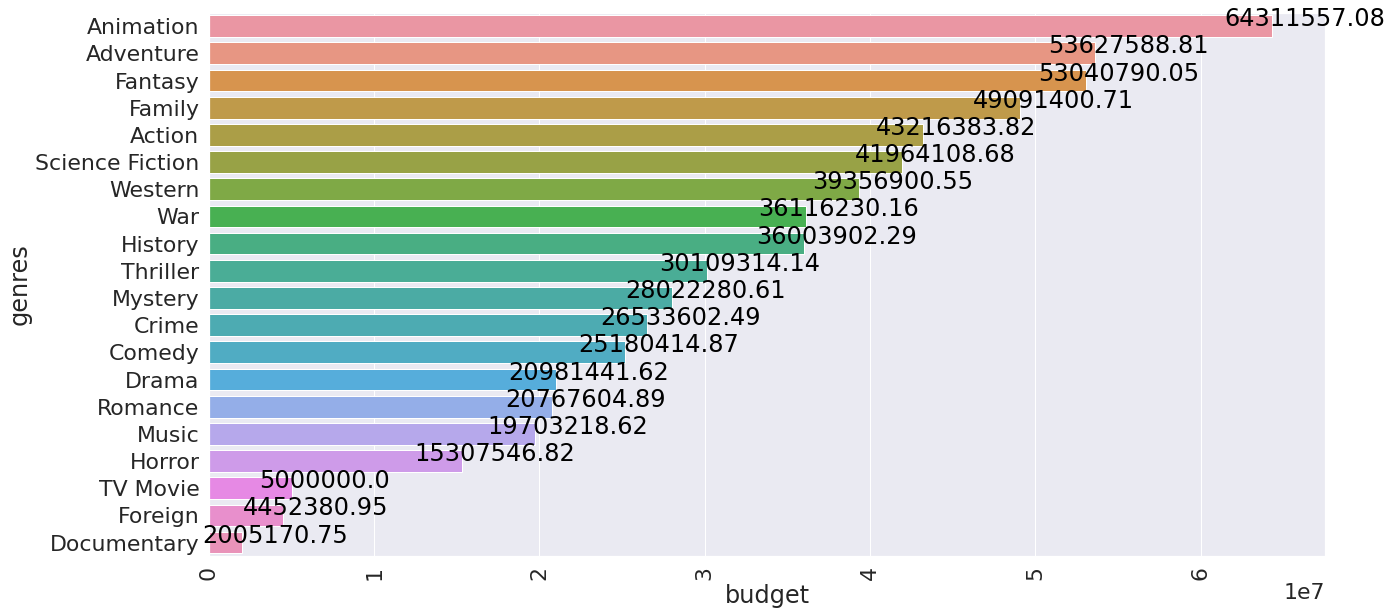

In [46]:

# plot properties
sns.set_style('whitegrid')
sns.set_context({"figure.figsize": (20, 10)})
sns.set(font_scale=2) # scale of font size of the plot
g = sns.barplot(x='budget',y='genres', data=genres)
# setting text on bars
for index, row in genres.iterrows():
    g.text(row.budget+2000500,row.name, round(row.budget,2), color='black', ha="center")
plt.xticks(rotation=90);

> Here we can see that the most 5 genres that take highest budget are Adventures, Fantasy, Animation, Action, and Family

#### Average Revenue of Movies in Each Genre

In [47]:
genres = genres.sort_values('revenue',ascending=False).reset_index(drop=True)
genres

,genres,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
0,Animation,1.336465,6.431156e+07,1.977484e+08,88.470320,638.123288,6.300000,6.990134e+07,2.251560e+08
1,Family,1.084457,4.909140e+07,1.466339e+08,97.245763,449.317797,6.046186,5.645594e+07,1.818938e+08
2,Adventure,1.181404,5.362759e+07,1.432246e+08,109.079893,560.035952,6.021971,6.473026e+07,1.914375e+08
3,Fantasy,1.198423,5.304079e+07,1.405580e+08,103.878282,563.064439,5.936993,6.182099e+07,1.695528e+08
4,Action,1.053208,4.321638e+07,1.059565e+08,108.541451,496.565630,5.938083,5.247147e+07,1.409881e+08
5,Science Fiction,1.103882,4.196411e+07,1.007498e+08,105.280000,554.948571,5.888190,5.166848e+07,1.335796e+08
6,War,0.954348,3.611623e+07,8.119169e+07,126.515873,393.246032,6.500794,4.891143e+07,1.197933e+08
7,Comedy,0.838748,2.518041e+07,7.698570e+07,101.048150,295.349383,5.989078,2.998513e+07,9.944330e+07
8,Thriller,0.953548,3.010931e+07,7.411856e+07,107.701031,390.173785,6.007364,3.653322e+07,1.026118e+08
9,Mystery,0.924395,2.802228e+07,7.136079e+07,109.853535,342.694444,6.135101,3.439678e+07,9.301576e+07


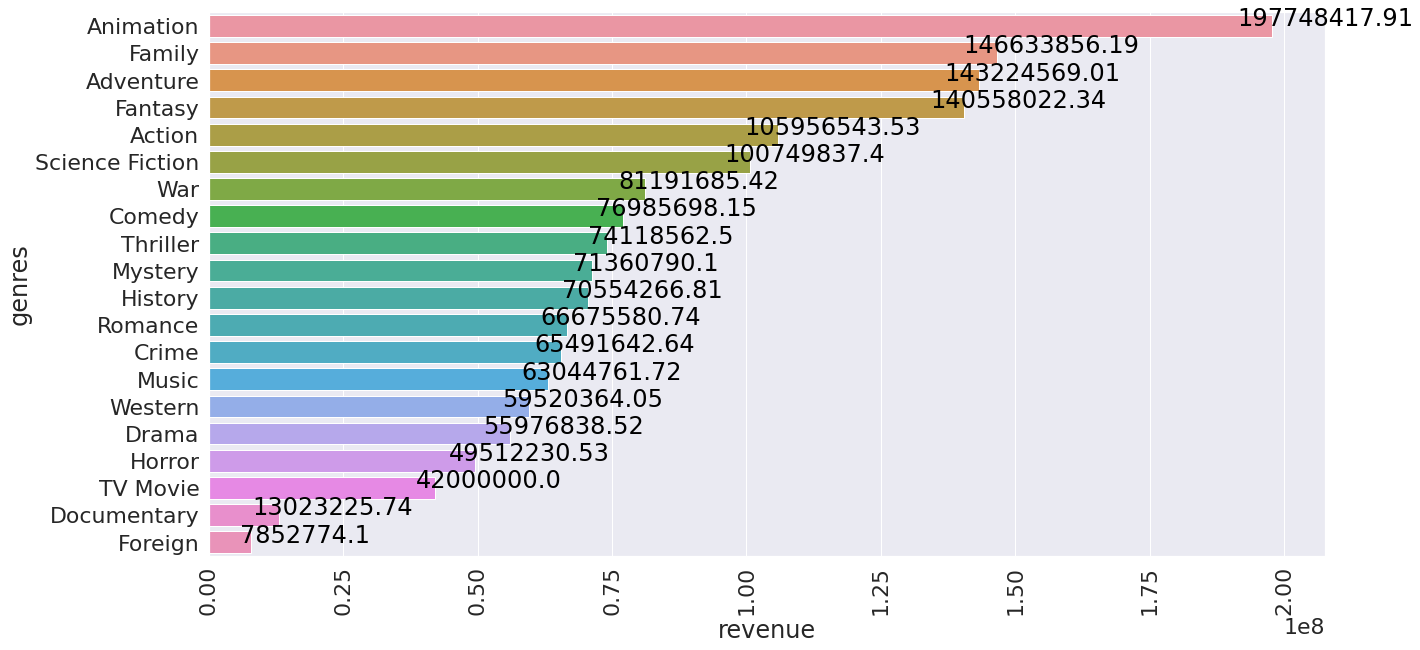

In [48]:

# plot properties
sns.set_style('whitegrid')
sns.set_context({"figure.figsize": (20, 10)})
sns.set(font_scale=2) # scale of font size of the plot
g = sns.barplot(x='revenue',y='genres', data=genres)
# setting text on bars
for index, row in genres.iterrows():
    g.text(row.revenue+10000000,row.name, round(row.revenue,2), color='black', ha="center")
plt.xticks(rotation=90);

> And Also we can see that the same top 5 genres take highest budget are getting highest revenue.

## Research Question (5) : What are the empact of production companies in revenue and budget?

### Exploring top production companies in term of revenue and budget

#### preparing data

In [49]:
# grouping dataframe with production companies in terms of choosing highest 10 budget production companies
prod_comp_budget = df_production_companies_expanded[['production_companies','budget']].groupby('production_companies').mean().sort_values('budget',ascending=False).head(10)
prod_comp_budget


,budget
production_companies,
Boram Entertainment Inc.,425000000.0
Blind Wink Productions,255000000.0
Silver Bullet Productions (II),255000000.0
Propeler,225000000.0
Ozumi Films,225000000.0
Film 44,209000000.0
Apparatus Productions,200000000.0
The Halcyon Company,200000000.0
Farewell Productions,200000000.0


In [50]:
production_companies_budget = df_production_companies_expanded[df_production_companies_expanded['production_companies'].isin(prod_comp_budget.index)].groupby('production_companies').mean().reset_index()
production_companies_budget

,production_companies,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
0,Apparatus Productions,2.604638,200000000,531865000,116,3822,6.7,1.872067e+08,4.978434e+08
1,Blind Wink Productions,1.214510,255000000,89289910,149,1607,6.0,2.386885e+08,8.357833e+07
2,Boram Entertainment Inc.,0.250540,425000000,11087569,100,74,6.4,4.250000e+08,1.108757e+07
3,Farewell Productions,2.979786,200000000,769653595,158,3533,5.6,2.032801e+08,7.822762e+08
4,Film 44,1.630455,209000000,303025485,131,1523,5.5,1.984966e+08,2.877967e+08
5,Indochina Productions,0.760503,195000000,1123746996,154,2456,6.1,1.890326e+08,1.089358e+09
6,Ozumi Films,1.628345,225000000,419651413,150,891,6.1,2.278770e+08,4.250173e+08
7,Propeler,1.628345,225000000,419651413,150,891,6.1,2.278770e+08,4.250173e+08
8,Silver Bullet Productions (II),1.214510,255000000,89289910,149,1607,6.0,2.386885e+08,8.357833e+07
9,The Halcyon Company,3.789633,200000000,371353001,115,1670,5.8,2.032801e+08,3.774434e+08


#### Average Budget for top 10 Production Companies in terms of Budget

In [51]:
production_companies_budget = production_companies_budget.sort_values('budget' ,ascending=False).reset_index(drop=True) # sort dataframe based on budget

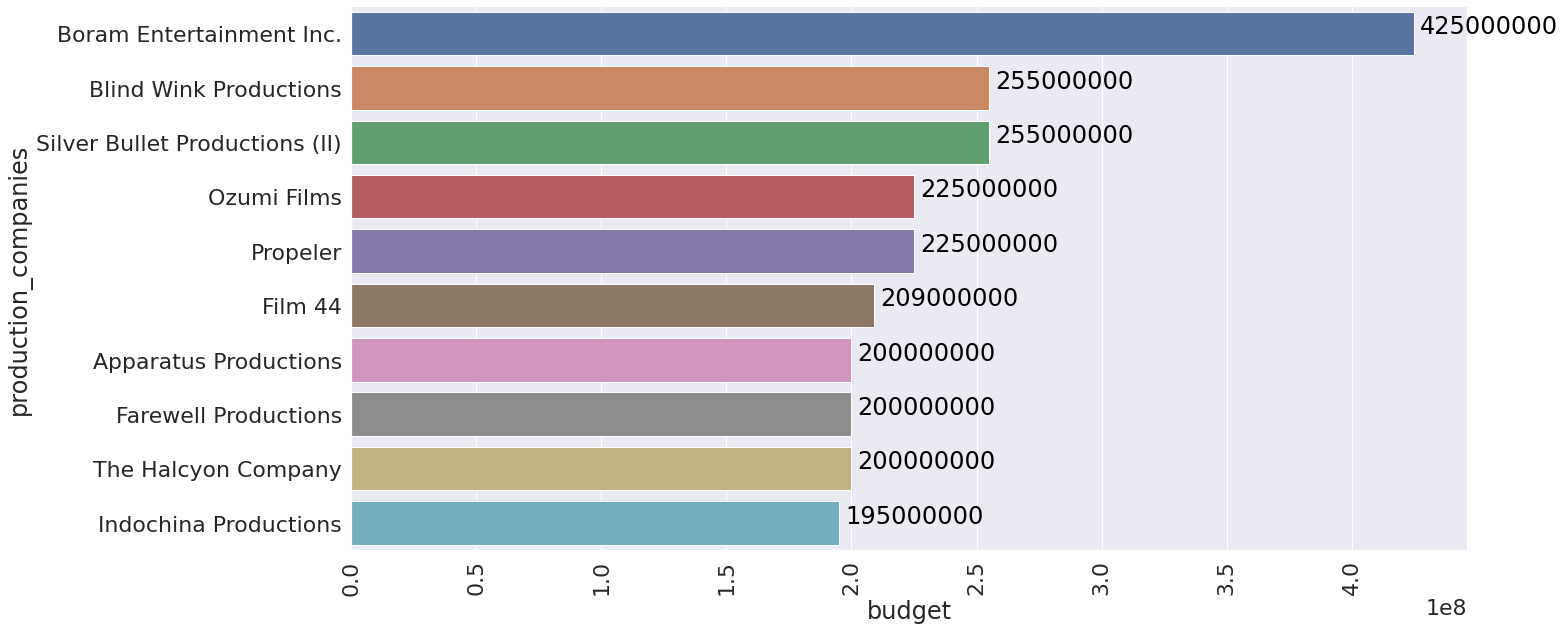

In [52]:

# plot properties
sns.set_style('whitegrid')
sns.set_context({"figure.figsize": (20, 10)})
sns.set(font_scale=2) # scale of font size of the plot
g = sns.barplot(x='budget',y='production_companies', data=production_companies_budget)
# setting text on bars
for index, row in production_companies_budget.iterrows():
    g.text(row.budget+30000000,row.name, round(row.budget,2), color='black', ha="center")
plt.xticks(rotation=90);

#### Average Revenue for top 10 Production Companies in terms of Budget

In [ ]:
production_companies_budget = production_companies_budget.sort_values('revenue' ,ascending=False).reset_index(drop=True) # sort data based on revenue

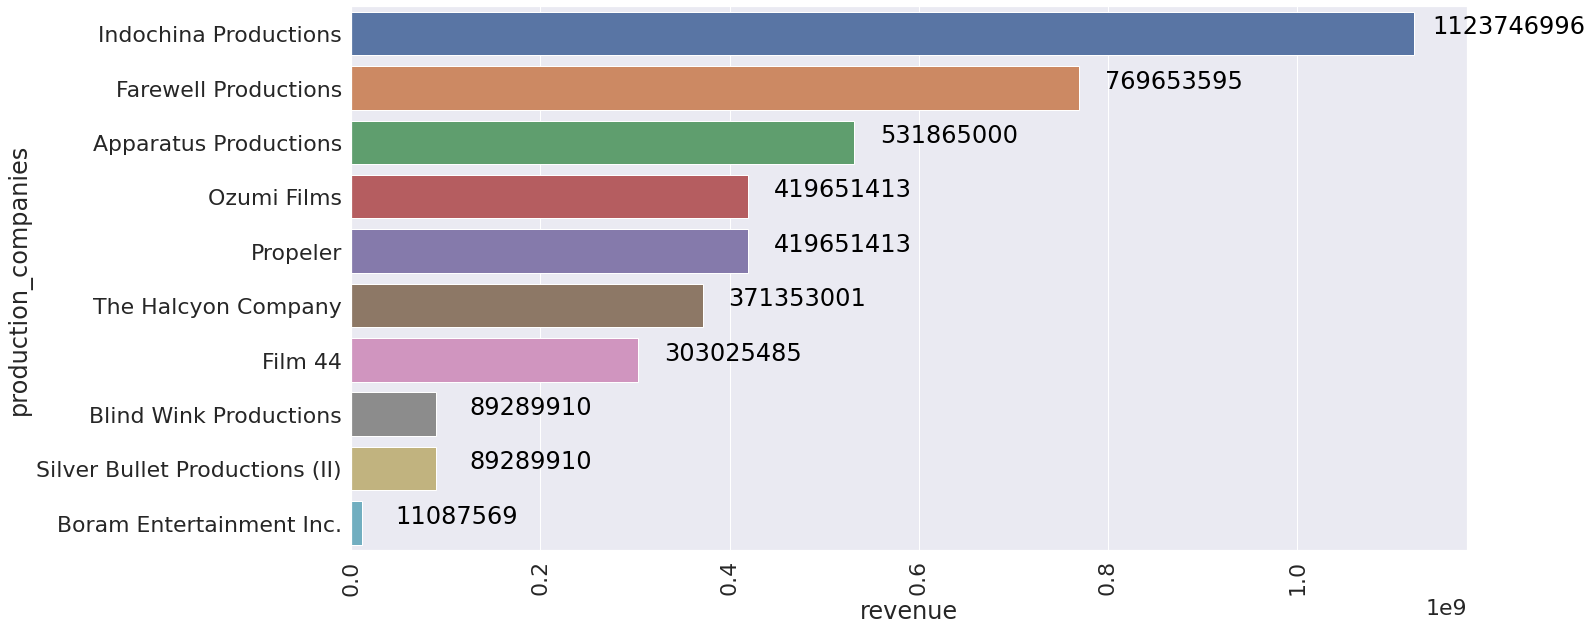

In [54]:

# plot properties
sns.set_style('whitegrid')
sns.set_context({"figure.figsize": (20, 10)})
sns.set(font_scale=2) # scale of font size of the plot
g = sns.barplot(x='revenue',y='production_companies', data=production_companies_budget)
# setting text on bars
for index, row in production_companies_budget.iterrows():
    g.text(row.revenue+100000000,row.name, round(row.revenue,2), color='black', ha="center")
plt.xticks(rotation=90);

#### Average Revenue for top 10 Production Companies in terms of Revenue

In [55]:
# Choose the highest 10 production companies revenue
prod_comp_revenue = df_production_companies_expanded[['production_companies','revenue']].groupby('production_companies').mean().sort_values('revenue',ascending=False).head(10)
prod_comp_revenue

,revenue
production_companies,
Indochina Productions,1.123747e+09
Disney Enterprises,8.646260e+08
Farewell Productions,7.696536e+08
Government of Malta,7.582399e+08
Total Entertainment,7.121719e+08
TSBD Canada Productions,7.121719e+08
Zohar International,7.121719e+08
Pixar Animation Studios,6.153195e+08
Internationale Filmproduktion Richter,6.098416e+08


In [56]:
production_companies_revenue = df_production_companies_expanded[df_production_companies_expanded['production_companies'].isin(prod_comp_revenue.index)].groupby('production_companies').mean().reset_index()
production_companies_revenue

,production_companies,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
0,Disney Enterprises,3.440519,9.400000e+07,8.646260e+08,100.000000,3692.000000,7.400000,1.114231e+08,1.024887e+09
1,Farewell Productions,2.979786,2.000000e+08,7.696536e+08,158.000000,3533.000000,5.600000,2.032801e+08,7.822762e+08
2,Government of Malta,3.655536,1.250000e+08,7.582399e+08,149.000000,1585.000000,6.400000,1.352086e+08,8.201647e+08
3,Indochina Productions,0.760503,1.950000e+08,1.123747e+09,154.000000,2456.000000,6.100000,1.890326e+08,1.089358e+09
4,Internationale Filmproduktion Richter,2.543535,5.200000e+07,6.098416e+08,108.000000,805.000000,6.200000,5.266490e+07,6.176395e+08
5,Littlestar,2.543535,5.200000e+07,6.098416e+08,108.000000,805.000000,6.200000,5.266490e+07,6.176395e+08
6,Pixar Animation Studios,2.849023,1.473636e+08,6.153195e+08,100.363636,2478.636364,6.954545,1.557392e+08,6.675534e+08
7,TSBD Canada Productions,1.888096,1.100000e+08,7.121719e+08,117.000000,1658.000000,5.800000,1.066338e+08,6.903780e+08
8,Total Entertainment,1.888096,1.100000e+08,7.121719e+08,117.000000,1658.000000,5.800000,1.066338e+08,6.903780e+08
9,Zohar International,1.888096,1.100000e+08,7.121719e+08,117.000000,1658.000000,5.800000,1.066338e+08,6.903780e+08


In [57]:
production_companies_revenue = production_companies_revenue.sort_values('revenue',ascending=False).reset_index(drop=True) # sort data based on revenue

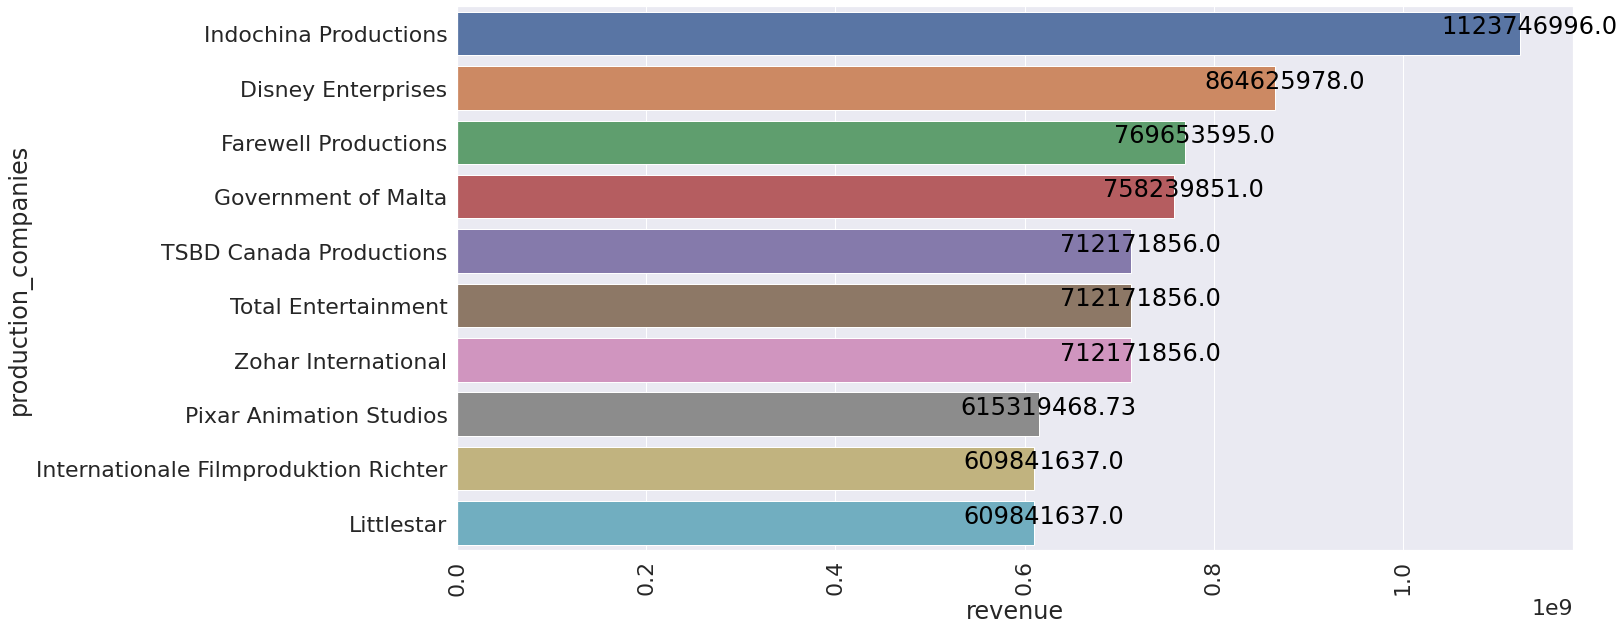

In [58]:

# plot properties
sns.set_style('whitegrid')
sns.set_context({"figure.figsize": (20, 10)})
sns.set(font_scale=2) # scale of font size of the plot
g = sns.barplot(x='revenue',y='production_companies', data=production_companies_revenue)
# setting text on bars
for index, row in production_companies_revenue.iterrows():
    g.text(row.revenue+10000000,row.name, round(row.revenue,2), color='black', ha="center")
plt.xticks(rotation=90);

#### Average Budget for top 10 Production Companies in terms of Revenue

In [59]:
production_companies_revenue = production_companies_revenue.sort_values('budget',ascending=False).reset_index(drop=True) # sort data based on budget

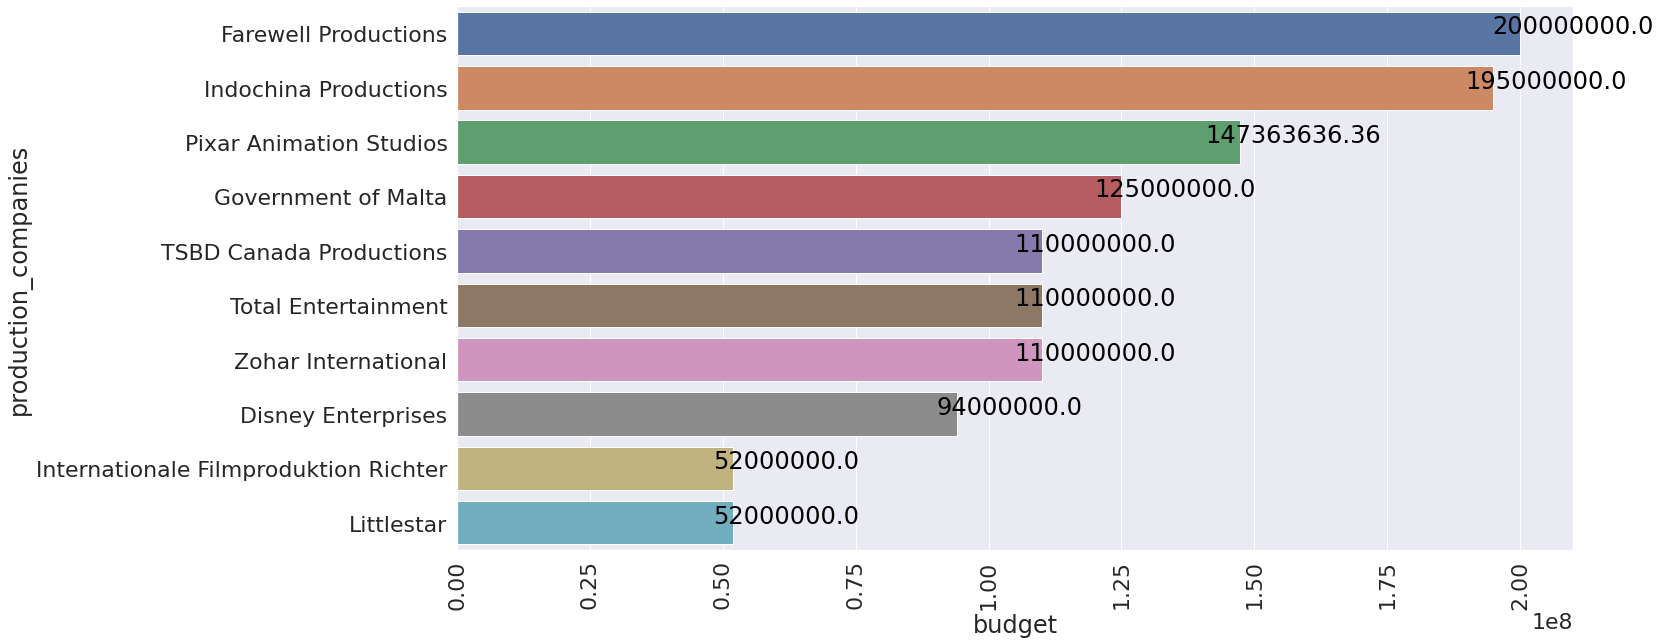

In [60]:

# plot properties
sns.set_style('whitegrid')
sns.set_context({"figure.figsize": (20, 10)})
sns.set(font_scale=2) # scale of font size of the plot
g = sns.barplot(x='budget',y='production_companies', data=production_companies_revenue)
# setting text on bars
for index, row in production_companies_revenue.iterrows():
    g.text(row.budget+10000000,row.name, round(row.budget,2), color='black', ha="center")
plt.xticks(rotation=90);

## Exploring Coorelation Between Columns

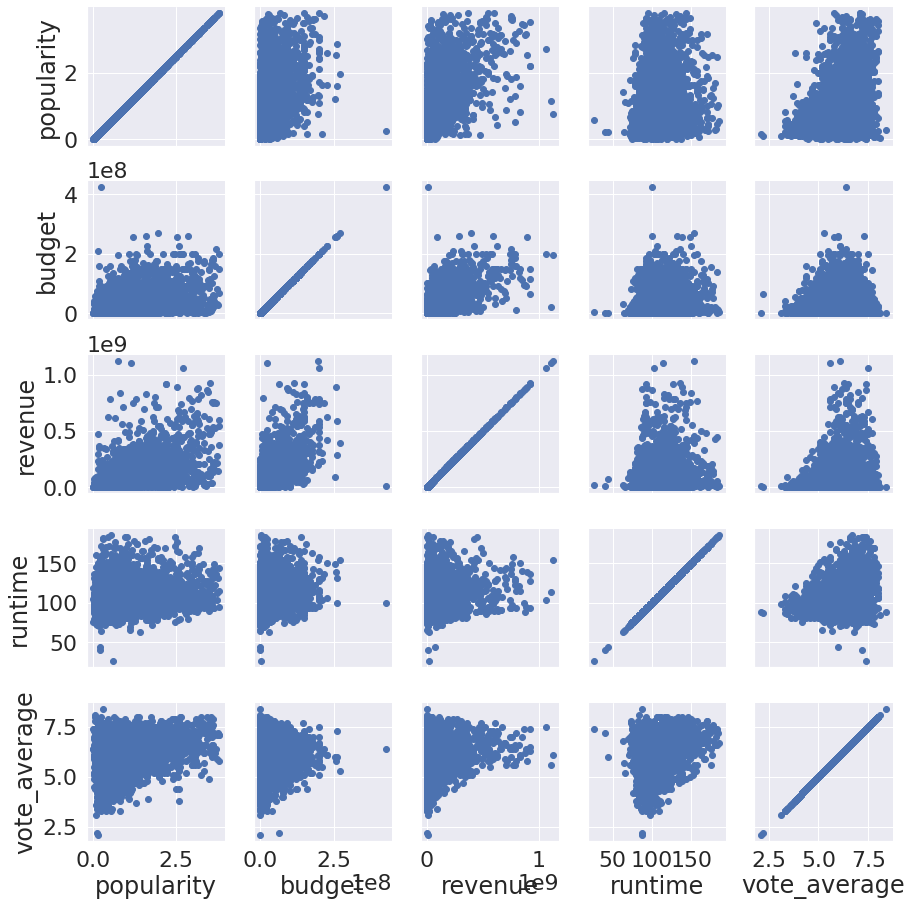

In [61]:
g = sns.PairGrid(df, vars=["popularity", "budget",'revenue','runtime','vote_average'])
g.map(plt.scatter);

Text(0, 0.5, 'Popularity')

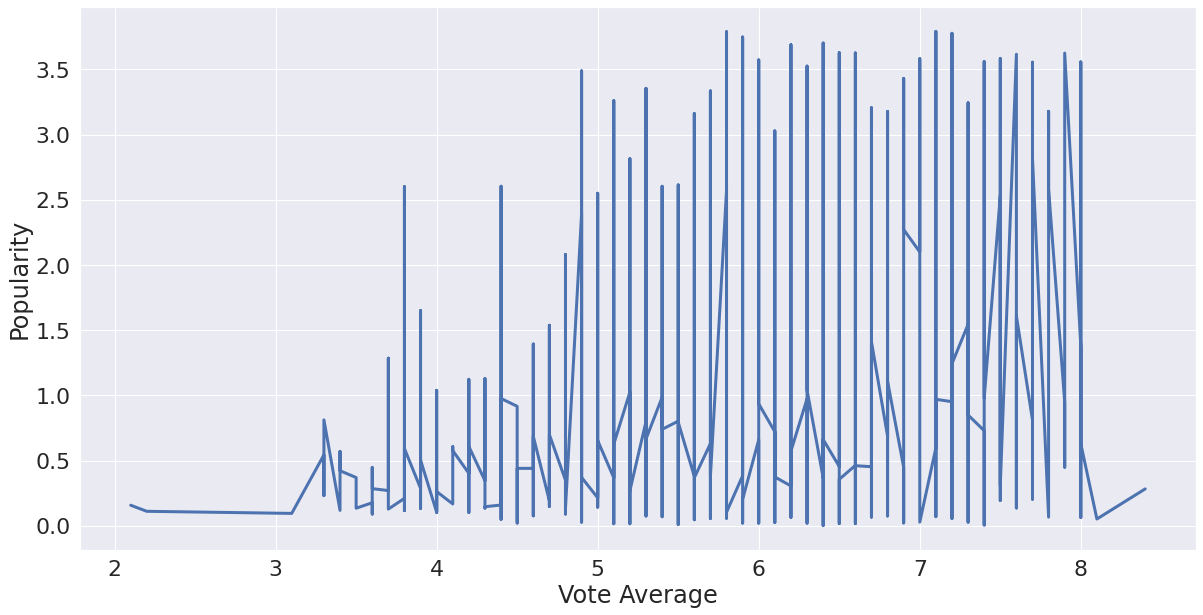

In [62]:
plt.plot(df.sort_values('vote_average')['vote_average'],df.sort_values('vote_average')['popularity'],linewidth=3)
plt.xlabel('Vote Average')
plt.ylabel('Popularity')

> In this plot we can see that with increasing of the vote increasing in the popularity occur which maks a good relationship and of course make sense.

> And Also from the Matrix plot we can see that the relationship between budget and revenue is high beside of course voting andf popularity.

> Also Runtime is a great factor when analyzing Movies since some hypothesis can be proved like that when runtime increase of course the budget increases too. 
> An exciting finiding here is shown related to the runtime that when it increases also revenue increase which is strange but it can be true.


## Limitations

> What was challenging while working in this dataset was :

1. in the Cleaning step identifying outliers and removing them also beside dealing with missing data. It was very chellenging taking the step of dropping missing data or filling it but the case we had here can't fill the missing data with any alternative so the best decision we see is to drop them so the analysis can be more clear and convenient.

2. Finding right questions was really challenging for me since there are a lot of questions that can be asked regarding this dataset but the important thing is to ask the right question that can support your analysis specially that the key hypothesis I chose to investigate here the relation between budget and revenue. Also finding other factors that effect the revenue.

3. Chosing the right visualizations was very challenging and took time to finally find the best viualizations that can prove my findings.

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, We can Now finalize our fnding here in some points:

1. The Popular movies are close to be high rated than others and this we proved it with visualization.

2. In The latest 5 years that are shown in the dataset the movie making industry had lower budget in movies which absloutly leads to decreasing in the revenue and that was very obvious from the visulaizations.

3. We fount that the top 5 generes that take higher budegt also give higher revenue.

4. We Also Explored the dataset in terms of cast and we found that most of the actors that there movies had hgh budget they also have higher revienue.

5. From the ineteresting things as we discussed earlier the runtime factor and its affects on the growth of revenue and budget.

6. Finally we can conclude from all of this that this dataset can be very useful to indicates the factors that can affect the movie industry like time, runtime, budget, and actors popularity.

7. This Analysis report is the a start for exploring more about this case and of course there will be future work like using ML to predict the revenue of future published movies in term of past movies data and asloutly getting more data from this case will be more useful for our case study here.